# Adaptive Control is Reversed Between Hands After Left Hemisphere Stroke and Lost Following Right Hemisphere Stroke
***Rini Varghese, James E Gordon, Robert L Sainburg, Carolee J Winstein, Nicolas Schweighofer***

Now published in the *Proceedings of the National Academy of Sciences*
Analysis based on reviewer comments in NB section #9

In [2]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

## Load libraries & set theme


In [37]:
rm(list=ls())
options(warn=-1)
ReqdLibs = c("repr","ggplot2","ggpubr","patchwork","IRdisplay","dplyr","tidyr","lemon","lme4","gghalves","robustlmm",
             "lme4","ggExtra","grid","nlme","sjPlot","sjstats","table1","emmeans","broom","svglite","influence.ME","ggplotify")

invisible(lapply(ReqdLibs, library, character.only = TRUE))

thm = theme(
          strip.text.x=element_text(size=20,face="bold"),
          strip.text.y=element_text(size=20,face="bold"),
          legend.text=element_text(size=16,face="bold"),
          legend.position = "top",
          legend.title=element_text(size=16,face="bold"),
          title =element_text(size=14, face='bold'),
          text = element_text(colour = "black",size=18), 
          plot.title = element_text(colour = "black",size = 22, face = "bold"),
          axis.ticks.length = unit(0.3,"cm"),
          axis.line = element_line(colour = "black",size=0.85),
          axis.ticks = element_line(colour = "black",size=0.85),
          axis.text = element_text(colour = "black",size=24),
          axis.title=element_text(size=25)) 

display_markdown("Libraries loaded. Theme set")
options(warn=0)

Libraries loaded. Theme set

In [38]:
annotate_npc <- function(label, x, y, ...)
{
  ggplot2::annotation_custom(grid::textGrob(
    x = unit(x, "npc"), y = unit(y, "npc"), label = label, ...))
}

## Hypothesis & predictions

**Null Hypothesis:** Responsibility assignment is fully flexible <br>
**Alt. Hypothesis:** Responsibility assignment relies on right hemisphere specialization

In [39]:
Hand = c(rep("Left Hand", 3), rep("Right Hand", 3))
Group = rep(c("Left Hemiparesis", "Controls", "Right Hemiparesis"), 2)
Pred = c(rep("alt", 6), rep("null", 6))
#     LLHP1 LCTRL1 LRHP1 RLHP1 RCTRL1 RRHP1 LLHP0 LCTRL0 LRHP0 RLHP0 RCTRL0 RRHP0
g = c(0, -0.5, 0, 0, 0, -0.5, -0.75, -0.5, 0, 0, 0, -0.5)
acf = c(0, 0.5, 0, 0, 0, 0.5, 0.75, 0.5, 0, 0, 0, 0.5)


hypoDat = data.frame(Hand, Group, Pred, g, acf)
hypoDat$Hand = factor(hypoDat$Hand, levels = c("Left Hand", "Right Hand"))
hypoDat$Group = factor(hypoDat$Group, levels = c("Left Hemiparesis", "Controls","Right Hemiparesis"))
hypoDat

Hand,Group,Pred,g,acf
<fct>,<fct>,<chr>,<dbl>,<dbl>
Left Hand,Left Hemiparesis,alt,0.00,0.00
Left Hand,Controls,alt,-0.50,0.50
Left Hand,Right Hemiparesis,alt,0.00,0.00
Right Hand,Left Hemiparesis,alt,0.00,0.00
Right Hand,Controls,alt,0.00,0.00
Right Hand,Right Hemiparesis,alt,-0.50,0.50
Left Hand,Left Hemiparesis,null,-0.75,0.75
Left Hand,Controls,null,-0.50,0.50
Left Hand,Right Hemiparesis,null,0.00,0.00


Hand,Group,Pred,g,acf
<fct>,<fct>,<chr>,<dbl>,<dbl>
Left Hand,Left Hemiparesis,alt,0.00,0.00
Left Hand,Controls,alt,-0.50,0.50
Left Hand,Right Hemiparesis,alt,0.00,0.00
Right Hand,Left Hemiparesis,alt,0.00,0.00
Right Hand,Controls,alt,0.00,0.00
Right Hand,Right Hemiparesis,alt,-0.50,0.50
Left Hand,Left Hemiparesis,null,-0.75,0.75
Left Hand,Controls,null,-0.50,0.50
Left Hand,Right Hemiparesis,null,0.00,0.00


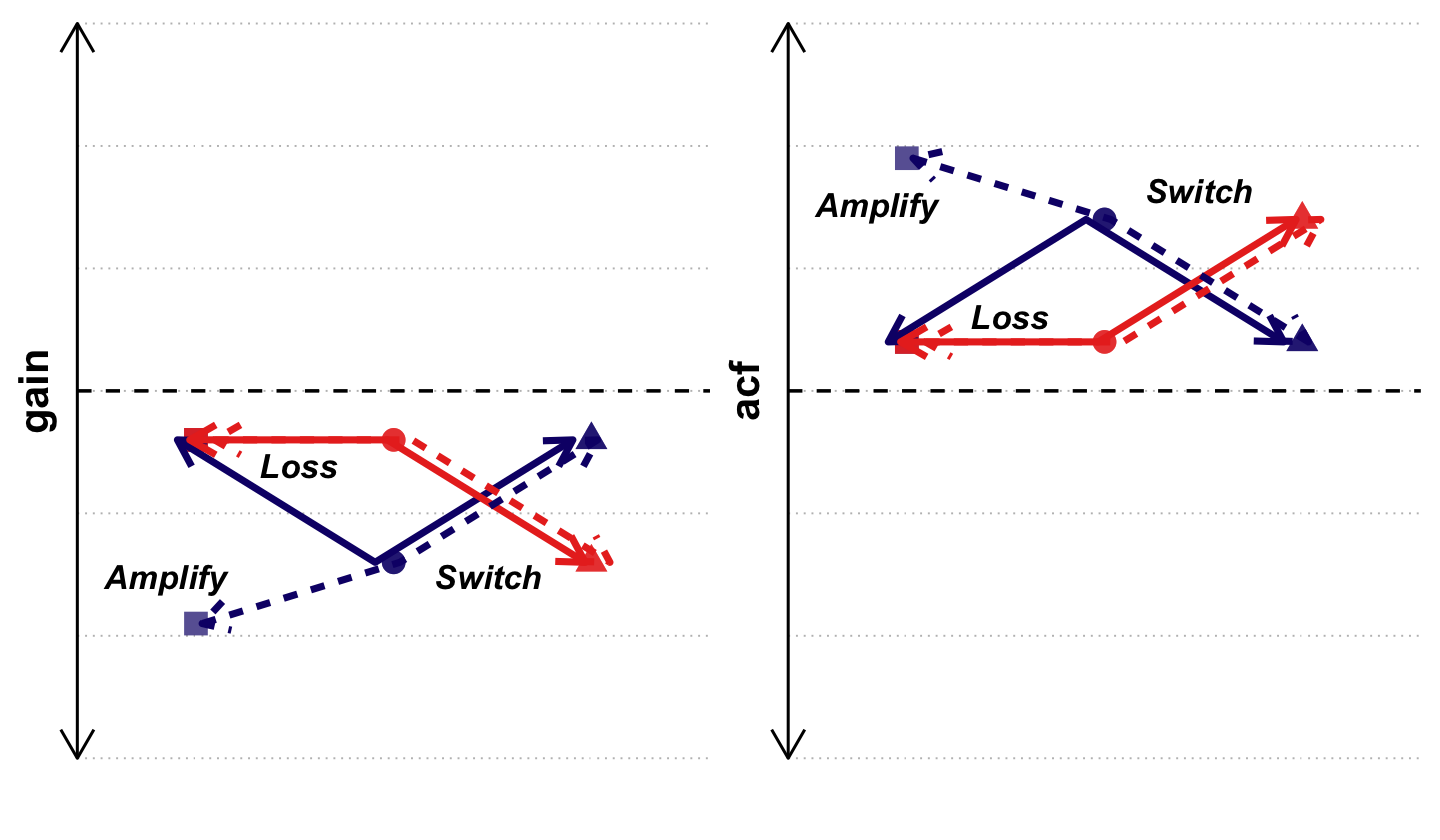

In [40]:
options(repr.plot.width = 12, repr.plot.height = 7)
options(warn = -1)

gr1 = ggplot(data = hypoDat, aes(x = Group, y = g-0.2, shape = Group, col = Hand, lty = Pred)) +
    stat_summary(mapping = NULL, data = NULL, show.legend = FALSE, geom = "pointrange",
        fun.data = mean_se, position = position_dodge(width = 0), size = 1.5, lwd = 3,
        alpha = 0.7) + geom_line(aes(group = interaction(Hand, Pred), col = Hand,
    lty = Pred), size = 2, alpha = 1, show.legend = FALSE, position = position_dodge(width = 0.25),
    arrow = arrow(ends = "both", type = "open")) + geom_hline(yintercept = 0, linetype = "dashed",
    size = 1) + coord_capped_cart(ylim = c(-1.38, 1.38), bottom = "both", left = "both") +
    xlab("") + ylab("gain") + scale_color_manual(values = c("#110176", "#E93324")) +
    scale_fill_manual(values = c("#110176", "#E93324")) + scale_shape_manual(values = c(15,
    16, 17)) + theme_pubclean() + thm + annotate_npc("Loss", x = unit(c(0.35), "npc"),
    y = unit(c(0.4), "npc"), gp = gpar(fontsize = 20, fontface = 4, col = "black")) +
    annotate_npc("Amplify", x = unit(c(0.14), "npc"), y = unit(c(0.25), "npc"), gp = gpar(fontsize = 20,
        fontface = 4, col = "black")) + annotate_npc("Switch", x = unit(c(0.65),
    "npc"), y = unit(c(0.25), "npc"), gp = gpar(fontsize = 20, fontface = 4, col = "black")) +

theme(axis.line.x = element_line(colour = "white"), axis.text.x = element_blank(),
    axis.ticks.x = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(),
    axis.line.y = element_line(arrow = grid::arrow(length = unit(0.7, "cm"), ends = "both")))

gr2 = ggplot(data = hypoDat, aes(x = Group, y = acf +0.2, shape = Group, col = Hand, linetype = Pred)) +
    stat_summary(mapping = NULL, data = NULL, show.legend = FALSE, geom = "pointrange",
        fun.data = mean_se, position = position_dodge(width = 0), size = 1.5, lwd = 3,
        alpha = 0.7) + geom_line(aes(group = interaction(Hand, Pred), col = Hand,
    linetype = Pred), size = 2, alpha = 1, show.legend = FALSE, position = position_dodge(width = 0.25),
    arrow = arrow(ends = "both", type = "open")) + geom_hline(yintercept = 0, linetype = "dashed",
    size = 1) + coord_capped_cart(ylim = c(-1.38, 1.38), bottom = "both", left = "both") +
    xlab("") + ylab("acf") + scale_color_manual(values = c("#110176", "#E93324")) +
    scale_fill_manual(values = c("#110176", "#E93324")) + scale_shape_manual(values = c(15,
    16, 17)) + annotate_npc("Loss", x = unit(c(0.35), "npc"), y = unit(c(0.6), "npc"),
    gp = gpar(fontsize = 20, fontface = 4, col = "black")) + annotate_npc("Amplify",
    x = unit(c(0.14), "npc"), y = unit(c(0.75), "npc"), gp = gpar(fontsize = 20,
        fontface = 4, col = "black")) + annotate_npc("Switch", x = unit(c(0.65),
    "npc"), y = unit(c(0.77), "npc"), gp = gpar(fontsize = 20, fontface = 4, col = "black")) +
    theme_pubclean() + thm + theme(axis.line.x = element_line(colour = "white"),
    axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.text.y = element_blank(),
    axis.ticks.y = element_blank(), axis.line.y = element_line(arrow = grid::arrow(length = unit(0.7,
        "cm"), ends = "both")))


gr1 + gr2 

options(warn = 0)

## Participant characteristics

In [41]:
demo = read.csv("forTable1_v2.csv", stringsAsFactors = FALSE)
library("table1")

demo$Sex = factor(demo$Sex, levels = c("M", "F"), labels = c("Male", "Female"))
# head(demo)

rndr <- function(x, name, ...) {
    if (!is.numeric(x))
        return(render.categorical.default(x))
    what <- switch(name, Age = "Mean (SD)", EHI = "Median [Min, Max]", Chronicity = "Median [Min, Max]",
        UEFM = "Median [Min, Max]")
    parse.abbrev.render.code(c("", what))(x)
}
strata <- c(split(demo, demo$SOL))
labels <- list(variables = list(Age = "Age (years)", Sex = "Sex", EHI = "Edinburgh Handedness Inventory",
    Chronicity = "Chronicity (months)", UEFM = "UE Fugl-Meyer (/66)"))

tt2 = table1(strata, labels, render = rndr)
display_html(tt2)

,Controls(N=20),Left Hemiparesis(N=15),Right Hemiparesis(N=15)
Age (years),,,
,,,
Mean (SD),26.9 (3.99),59.4 (14.3),63.5 (10.0)
Sex,,,
Male,9 (45.0%),8 (53.3%),11 (73.3%)
Female,11 (55.0%),7 (46.7%),4 (26.7%)
Edinburgh Handedness Inventory,,,
,,,
"Median [Min, Max]","89.4 [44.0, 100]","100 [50.0, 100]","100 [60.0, 100]"
Chronicity (months),,,


## Within-trial analysis (g)

### Read data

In [42]:
data = read.csv("YNC_AllData_120321_full.csv", stringsAsFactors = FALSE)  #

data %>%
    filter(CondG == c("BmC")) %>%
    mutate(Adj = PVDE - IDE) %>%
{
    bmCData <<- .
}

head(bmCData)

,Grp,Subj,SubNo,Cond,CondG,Dist,Trial,Hand,CT,RT,⋯,FDIST,CURV,OnAxErr,OffAxErr,XPosPV,YPosPV,XPosOff,YPosOff,XDistPV,Adj
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YNC,Subj001,1,BmC05,BmC,5,1,left,0.919,-0.03107,⋯,6.28059,0.15171,3.162355,0.1125651,0.9226155,1.041448,0.9231146,1.073100,-0.004901704,-5.20114
2,YNC,Subj001,1,BmC05,BmC,5,2,left,0.982,-0.10269,⋯,4.94105,0.08149,1.562621,1.0774370,0.9346758,1.026062,0.9327633,1.057103,0.007158609,-3.49286
3,YNC,Subj001,1,BmC05,BmC,5,3,left,0.928,-0.03145,⋯,7.03678,0.16236,1.992743,1.1736929,0.9284034,1.032699,0.9337259,1.061404,0.000886155,-5.48651
4,YNC,Subj001,1,BmC05,BmC,5,4,left,0.992,-0.10407,⋯,6.59775,0.28700,2.478371,-1.5180508,0.9109158,1.035750,0.9068085,1.066261,-0.016601443,-4.83403
5,YNC,Subj001,1,BmC05,BmC,5,5,left,0.946,-0.05807,⋯,3.97641,0.29868,-0.291631,-0.2004563,0.9108948,1.021032,0.9199844,1.038560,-0.016622415,-0.18322
6,YNC,Subj001,1,BmC05,BmC,5,6,left,0.994,-0.09745,⋯,5.60293,0.32918,1.634333,-2.5634031,0.9029615,1.028811,0.8963549,1.057820,-0.024555732,-4.46440


### Outlier detection & removal

In [43]:
isnt_out_z <- function(x, thres = 3, na.rm = TRUE) {
  abs(x - mean(x, na.rm = na.rm)) <= thres * sd(x, na.rm = na.rm)
}

compute_group_non_outliers <- . %>%
  # Compute per group mean values of columns
  group_by(group) %>%
  summarise_if(is.numeric, mean) %>%
  ungroup() %>%

  # Detect outliers among groups
  mutate_if(is.numeric, isnt_out_z)  %>% 
  # Remove unnecessary columns
  select_if(Negate(is.numeric))

In [44]:
head(bmCData)
colnames(bmCData)[1]="Grp"
bmCData  %>% 
unite(col = "group", Grp,Subj,Cond,Trial) %>% 
compute_group_non_outliers() %>% 
filter(Adj == FALSE | PV==FALSE | IDE==FALSE & PRDE==FALSE | PVDE==FALSE)  %>%  #
{.$group->> outs}
cat(paste(shQuote(outs, type="cmd"), collapse=", "))

dfTrials = dim(bmCData)[1]/3
perc_rem = (length(outs)/dfTrials)*100 # we divide by 3 because the data frame consists of 3 values (for hands & cursor) per trial

display_markdown(paste("<br>**With these outliers, we will be removing",length(outs),"data points out of ",dfTrials,"(",round(perc_rem,3),"%) of the data**"))


#below printout to rem

,Grp,Subj,SubNo,Cond,CondG,Dist,Trial,Hand,CT,RT,⋯,FDIST,CURV,OnAxErr,OffAxErr,XPosPV,YPosPV,XPosOff,YPosOff,XDistPV,Adj
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YNC,Subj001,1,BmC05,BmC,5,1,left,0.919,-0.03107,⋯,6.28059,0.15171,3.162355,0.1125651,0.9226155,1.041448,0.9231146,1.073100,-0.004901704,-5.20114
2,YNC,Subj001,1,BmC05,BmC,5,2,left,0.982,-0.10269,⋯,4.94105,0.08149,1.562621,1.0774370,0.9346758,1.026062,0.9327633,1.057103,0.007158609,-3.49286
3,YNC,Subj001,1,BmC05,BmC,5,3,left,0.928,-0.03145,⋯,7.03678,0.16236,1.992743,1.1736929,0.9284034,1.032699,0.9337259,1.061404,0.000886155,-5.48651
4,YNC,Subj001,1,BmC05,BmC,5,4,left,0.992,-0.10407,⋯,6.59775,0.28700,2.478371,-1.5180508,0.9109158,1.035750,0.9068085,1.066261,-0.016601443,-4.83403
5,YNC,Subj001,1,BmC05,BmC,5,5,left,0.946,-0.05807,⋯,3.97641,0.29868,-0.291631,-0.2004563,0.9108948,1.021032,0.9199844,1.038560,-0.016622415,-0.18322
6,YNC,Subj001,1,BmC05,BmC,5,6,left,0.994,-0.09745,⋯,5.60293,0.32918,1.634333,-2.5634031,0.9029615,1.028811,0.8963549,1.057820,-0.024555732,-4.46440


"LHP_Subj003_BmC05_17", "LHP_Subj004_BmC15_6", "LHP_Subj005_BmC15_17", "LHP_Subj007_BmC05_1", "LHP_Subj007_BmC05_4", "LHP_Subj009_BmC05_10", "LHP_Subj009_BmC05_18", "LHP_Subj009_BmC05_5", "LHP_Subj009_BmC05_8", "LHP_Subj009_BmC15_11", "LHP_Subj011_BmC05_10", "LHP_Subj011_BmC05_12", "LHP_Subj011_BmC05_13", "LHP_Subj011_BmC05_15", "LHP_Subj011_BmC05_17", "LHP_Subj011_BmC05_18", "LHP_Subj011_BmC05_19", "LHP_Subj011_BmC05_20", "LHP_Subj011_BmC15_1", "LHP_Subj011_BmC15_11", "LHP_Subj011_BmC15_12", "LHP_Subj011_BmC15_15", "LHP_Subj011_BmC15_16", "LHP_Subj011_BmC15_19", "LHP_Subj011_BmC15_2", "LHP_Subj012_BmC05_9", "LHP_Subj012_BmC15_7", "LHP_Subj013_BmC05_1", "LHP_Subj013_BmC05_10", "LHP_Subj013_BmC05_11", "LHP_Subj013_BmC05_14", "LHP_Subj013_BmC05_15", "LHP_Subj013_BmC05_19", "LHP_Subj013_BmC05_3", "LHP_Subj013_BmC05_5", "LHP_Subj013_BmC05_7", "LHP_Subj013_BmC05_8", "LHP_Subj013_BmC05_9", "LHP_Subj013_BmC15_20", "LHP_Subj014_BmC05_15", "LHP_Subj016_BmC15_8", "RHP_Subj001_BmC05_13", "RHP_Sub

<br>**With these outliers, we will be removing 55 data points out of  2000 ( 2.75 %) of the data**

In [45]:
# rem2 = c("LHP_Subj002_BmC05_10", "LHP_Subj003_BmC05_17", "LHP_Subj004_BmC05_5", "LHP_Subj004_BmC15_20", "LHP_Subj004_BmC15_6", "LHP_Subj005_BmC15_17", "LHP_Subj007_BmC05_1", "LHP_Subj007_BmC05_4", "LHP_Subj007_BmC15_18", "LHP_Subj008_BmC05_10", "LHP_Subj009_BmC05_10", "LHP_Subj009_BmC05_13", "LHP_Subj009_BmC05_18", "LHP_Subj009_BmC05_4", "LHP_Subj009_BmC05_5", "LHP_Subj009_BmC05_8", "LHP_Subj009_BmC15_10", "LHP_Subj009_BmC15_11", "LHP_Subj009_BmC15_16", "LHP_Subj011_BmC05_10", "LHP_Subj011_BmC05_17", "LHP_Subj011_BmC05_18", "LHP_Subj011_BmC05_19", "LHP_Subj011_BmC05_20", "LHP_Subj011_BmC05_6", "LHP_Subj011_BmC05_9", "LHP_Subj011_BmC15_1", "LHP_Subj011_BmC15_11", "LHP_Subj011_BmC15_12", "LHP_Subj011_BmC15_13", "LHP_Subj011_BmC15_15", "LHP_Subj011_BmC15_16", "LHP_Subj011_BmC15_19", "LHP_Subj011_BmC15_2", "LHP_Subj012_BmC05_6", "LHP_Subj012_BmC05_9", "LHP_Subj012_BmC15_7", "LHP_Subj012_BmC15_8",  "LHP_Subj013_BmC05_10",  "LHP_Subj013_BmC05_9", "LHP_Subj013_BmC05_15", "LHP_Subj013_BmC05_19", "LHP_Subj013_BmC05_3", "LHP_Subj013_BmC05_5", "LHP_Subj013_BmC05_7", "LHP_Subj013_BmC05_8",  "LHP_Subj014_BmC05_15", "LHP_Subj014_BmC05_6", "LHP_Subj016_BmC15_8", "RHP_Subj001_BmC05_13", "RHP_Subj001_BmC15_14", "RHP_Subj001_BmC15_2", "RHP_Subj002_BmC05_7", "RHP_Subj003_BmC05_17", "RHP_Subj003_BmC05_8", "RHP_Subj003_BmC15_8", "RHP_Subj005_BmC15_15", "RHP_Subj006_BmC05_3", "RHP_Subj006_BmC05_8", "RHP_Subj006_BmC15_14", "RHP_Subj006_BmC15_7", "RHP_Subj007_BmC05_2", "RHP_Subj007_BmC15_3", "RHP_Subj007_BmC15_6", "RHP_Subj008_BmC05_15", "RHP_Subj011_BmC05_16", "RHP_Subj011_BmC05_3", "RHP_Subj011_BmC05_8", "RHP_Subj012_BmC15_15", "RHP_Subj012_BmC15_6", "RHP_Subj013_BmC05_12", "RHP_Subj013_BmC05_13", "RHP_Subj013_BmC05_17", "RHP_Subj013_BmC05_8", "RHP_Subj015_BmC05_5", "YNC_Subj004_BmC05_16", "YNC_Subj009_BmC05_4"
# )

rem2 = c("LHP_Subj003_BmC05_17", "LHP_Subj004_BmC15_6", "LHP_Subj005_BmC15_17", "LHP_Subj007_BmC05_1", "LHP_Subj007_BmC05_4", "LHP_Subj009_BmC05_10", "LHP_Subj009_BmC05_18", "LHP_Subj009_BmC05_5", "LHP_Subj009_BmC05_8", "LHP_Subj009_BmC15_11", "LHP_Subj011_BmC05_10", "LHP_Subj011_BmC05_12", "LHP_Subj011_BmC05_13", "LHP_Subj011_BmC05_15", "LHP_Subj011_BmC05_17", "LHP_Subj011_BmC05_18", "LHP_Subj011_BmC05_19", "LHP_Subj011_BmC05_20", "LHP_Subj011_BmC15_1", "LHP_Subj011_BmC15_11", "LHP_Subj011_BmC15_12", "LHP_Subj011_BmC15_15", "LHP_Subj011_BmC15_16", "LHP_Subj011_BmC15_19", "LHP_Subj011_BmC15_2", "LHP_Subj012_BmC05_9", "LHP_Subj012_BmC15_7", "LHP_Subj013_BmC05_1", "LHP_Subj013_BmC05_10", "LHP_Subj013_BmC05_11", "LHP_Subj013_BmC05_14", "LHP_Subj013_BmC05_15", "LHP_Subj013_BmC05_19", "LHP_Subj013_BmC05_3", "LHP_Subj013_BmC05_5", "LHP_Subj013_BmC05_7", "LHP_Subj013_BmC05_8", "LHP_Subj013_BmC05_9", "LHP_Subj013_BmC15_20", "LHP_Subj014_BmC05_15", "LHP_Subj016_BmC15_8", "RHP_Subj001_BmC05_13", "RHP_Subj001_BmC15_2", "RHP_Subj002_BmC05_7", "RHP_Subj005_BmC15_15", "RHP_Subj006_BmC15_14", "RHP_Subj007_BmC05_2", "RHP_Subj007_BmC15_6", "RHP_Subj008_BmC05_15", "RHP_Subj011_BmC05_3", "RHP_Subj011_BmC05_8", "RHP_Subj013_BmC05_12", "RHP_Subj013_BmC05_13", "RHP_Subj013_BmC05_8", "YNC_Subj004_BmC05_16"
)

In [46]:
bmCData  %>% 
unite(col = "group",Grp,Subj,Cond,Trial) %>% 
filter(!group %in% rem2) %>% 
separate(col = group, into = c("Grp","Subj","Cond","Trial"),sep = "_")  %>% 
pivot_wider(id_cols = NULL, names_from= Hand,values_from = c(CT,RT,PPT,TPV,MT,PV,EE,VE,IDE,PRDE,PVDE,FDE,FPE,IDIST,PVDIST,FDIST,
                                             CURV,OnAxErr,OffAxErr,Adj,XPosPV,YPosPV,XPosOff,YPosOff,XDistPV))  %>% 

pivot_longer(cols = c(Adj_left, Adj_right), names_to = "Hand",values_to = "Adjustment") %>% 
select(Grp,Subj,Cond,Trial,SubNo,CondG,Dist,Hand,IDE_cursor,Adjustment)  %>% 

{.->>bmCData2}

bmCData2$Hand <- factor(bmCData2$Hand, levels = c("Adj_left", "Adj_right"), labels = c("Left", "Right")) 

head(bmCData2)
bmCData2$Grp = factor(bmCData2$Grp, levels=c('YNC','RHP','LHP'))


Grp,Subj,Cond,Trial,SubNo,CondG,Dist,Hand,IDE_cursor,Adjustment
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>
YNC,Subj001,BmC05,1,1,BmC,5,Left,-7.20574,-5.20114
YNC,Subj001,BmC05,1,1,BmC,5,Right,-7.20574,6.50602
YNC,Subj001,BmC05,2,1,BmC,5,Left,-6.89997,-3.49286
YNC,Subj001,BmC05,2,1,BmC,5,Right,-6.89997,2.20555
YNC,Subj001,BmC05,3,1,BmC,5,Left,-2.80350,-5.48651
YNC,Subj001,BmC05,3,1,BmC,5,Right,-2.80350,6.49121


### *g* Single Represesentative Subjects

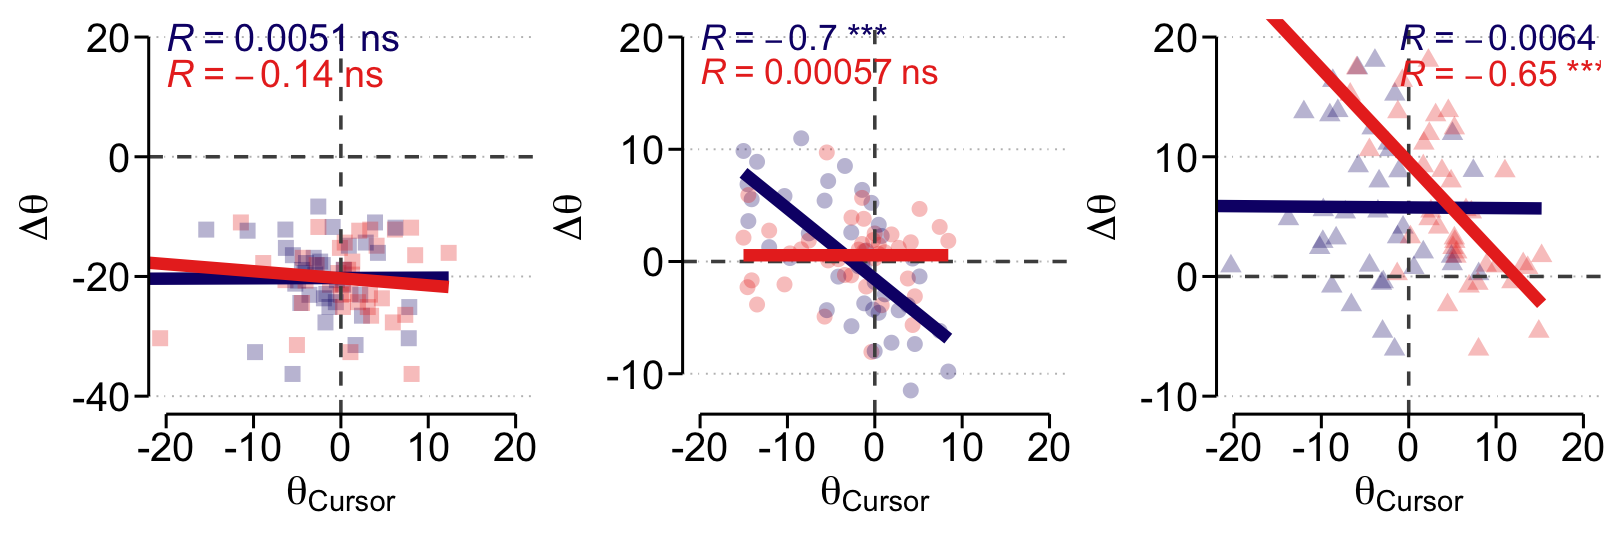

In [47]:
options(repr.plot.width = 13.5, repr.plot.height = 4.5)

Ind_subjGL = 
ggplot(bmCData2 %>% filter(SubNo==36), aes(y = IDE_cursor, x = Adjustment,na.rm = TRUE,group = Hand)) +
       geom_point(aes(col = Hand),stroke = 1.5, size = 3.5, shape = 15, show.legend = FALSE,alpha = 0.3) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'****'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),label.x = -20, label.y = c(20,14), size=8,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-40,20),bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand),  method = 'lm', fill=NA,formula = y~x, lwd=3.5,show.legend = FALSE,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + 
       scale_alpha_manual(values = c(0.7, 0.2)) +
       theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjL.svg', plot=Ind_subjGL, width=4.5, height=4.5)

Ind_subjG = 
ggplot(bmCData2 %>% filter(SubNo==14), aes(y = Adjustment, x = IDE_cursor,na.rm = TRUE)) +
       geom_point(aes(col = Hand),stroke = 1.5, alpha = 0.3, size = 3.5, shape = 16, show.legend = FALSE) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),label.x = -20, label.y = c(20,17),size=7.5,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-12,20), bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand,fill=Hand), fill=NA,method = 'lm', formula = y~x, lwd=3.5,show.legend = FALSE,alpha=0.1,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjG.svg', plot=Ind_subjG, width=4.5, height=4.5)

Ind_subjGR = 
ggplot(bmCData2 %>% filter(SubNo==21), aes(y = IDE_cursor, x =Adjustment ,na.rm = TRUE,group = Hand)) +
       geom_point(aes(col = Hand),stroke = 1.5, size = 3.5, shape = 17, show.legend = FALSE,alpha = 0.3) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),label.x = -1, label.y = c(20,17), size=7.5,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-10,20),bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand),  method = 'lm', fill=NA,formula = y~x, lwd=3.5,show.legend = FALSE,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + 
       theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjR.svg', plot=Ind_subjGR, width=4.5, height=4.5)

Ind_subjGALL = Ind_subjGL | Ind_subjG | Ind_subjGR

# ggsave(file='Ind_subjGALL.svg', plot=Ind_subjGALL, width=13.5, height=4.5)
Ind_subjGALL



In [48]:
options(dplyr.summarise.inform = FALSE)
options(warn = -1)
bmCData2 %>%
    group_by(Grp) %>%
    summarise(mean_theta_cursor = mean(IDE_cursor, na.rm = TRUE), se_acf = se(IDE_cursor, na.rm = TRUE))
options(dplyr.summarise.inform = TRUE)


Grp,mean_theta_cursor,se_acf
<fct>,<dbl>,<dbl>
YNC,-4.495351,0.1975443
RHP,-1.889187,0.3112893
LHP,-4.586225,0.4026761


### Group-wise estimates for *g* (from fixed effects)

In [49]:
options(warn = -1)
mixedModEstInter = suppressMessages(lmer(data = bmCData2, IDE_cursor ~ Grp + Grp:Hand:Adjustment +
    (1 + Grp:Hand:Adjustment | SubNo)))
coefs <- coef(summary(mixedModEstInter))
data.frame(coefs[, 1:2])
options(warn = 0)

,Estimate,Std..Error
,<dbl>,<dbl>
(Intercept),-4.6264323,1.30975520
GrpRHP,2.9358307,1.99869422
GrpLHP,0.4070487,2.00068142
GrpYNC:HandLeft:Adjustment,-0.5474603,0.06922628
GrpRHP:HandLeft:Adjustment,-0.1155544,0.08116438
GrpLHP:HandLeft:Adjustment,-0.1535723,0.06743758
GrpYNC:HandRight:Adjustment,-0.1442372,0.07575751
GrpRHP:HandRight:Adjustment,-0.2488456,0.04458200
GrpLHP:HandRight:Adjustment,-0.1875744,0.10694754


### Subject-wise estimates for *g* (from random effects)

In [50]:
Left = c(coef(mixedModEstInter)$SubNo[1:20,"GrpYNC:HandLeft:Adjustment"],
         coef(mixedModEstInter)$SubNo[21:32,"GrpRHP:HandLeft:Adjustment"],
         coef(mixedModEstInter)$SubNo[44:47,"GrpRHP:HandLeft:Adjustment"],         
         coef(mixedModEstInter)$SubNo[33:43,"GrpLHP:HandLeft:Adjustment"],
         coef(mixedModEstInter)$SubNo[48:50,"GrpLHP:HandLeft:Adjustment"])

Right = c(coef(mixedModEstInter)$SubNo[1:20,"GrpYNC:HandRight:Adjustment"],
         coef(mixedModEstInter)$SubNo[21:32,"GrpRHP:HandRight:Adjustment"],
         coef(mixedModEstInter)$SubNo[44:47,"GrpRHP:HandRight:Adjustment"],         
         coef(mixedModEstInter)$SubNo[33:43,"GrpLHP:HandRight:Adjustment"],
         coef(mixedModEstInter)$SubNo[48:50,"GrpLHP:HandRight:Adjustment"])


Grp = c(matrix('YNC',20),matrix('RHP',15),matrix('LHP',15)) #,

Subj = c(1:length(Left))
Slopes = data.frame(Subj,Grp,Left,Right)

# Pivot data table for analysis & plotting
Slopes  %>% 
pivot_longer(cols = c(Left,Right),names_to = "Hand",values_to = "g")  %>% 
{.->>MMEstGains}
MMEstGains$Grp = factor(MMEstGains$Grp, levels=c('LHP','YNC','RHP'))
head(MMEstGains)


Subj,Grp,Hand,g
<int>,<fct>,<chr>,<dbl>
1,YNC,Left,-0.54379971
1,YNC,Right,-0.06728542
2,YNC,Left,-0.62510505
2,YNC,Right,-0.12980678
3,YNC,Left,-0.37560941
3,YNC,Right,0.14613980


### Plotting *g* (hypothesis & results)

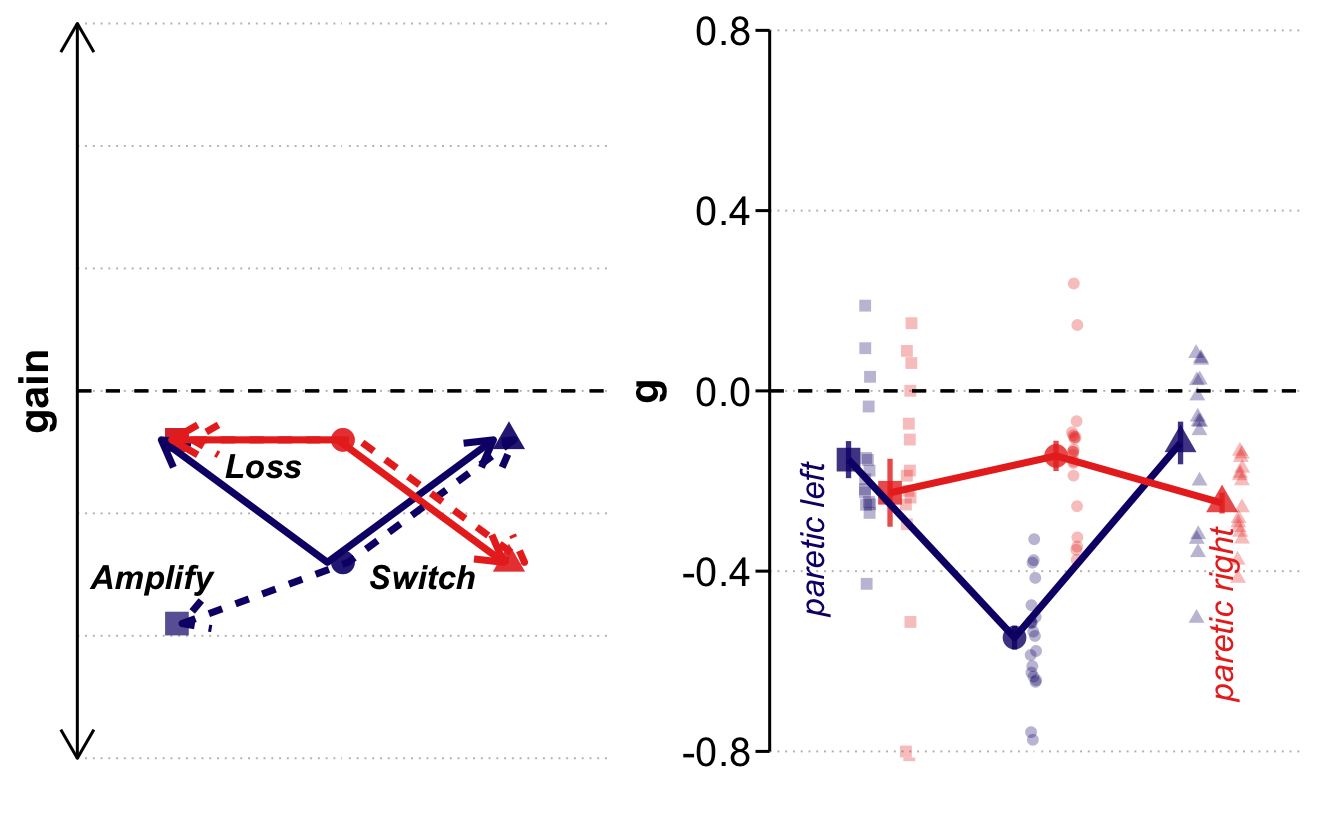

In [51]:
options(repr.plot.width = 11, repr.plot.height = 7)
options(warn = -1)

rs1 = ggplot(data = MMEstGains, aes(x = Grp, y = g, shape = Grp, col = Hand)) + stat_summary(mapping = NULL,
    data = NULL, fun.data = mean_se, alpha = 0.8, geom = "pointrange", position = position_dodge(width = 0.5),
    size = 1.5, lwd = 3, show.legend = FALSE) + geom_half_point_panel(aes(col = Hand),
    size = 3, alpha = 0.3, position = position_dodge(width = 0.5), show.legend = FALSE) +
    geom_line(aes(group = Hand, col = Hand), size = 2, fun.data = mean_se, alpha = 1,
        position = position_dodge(width = 0.5), stat = "summary", show.legend = FALSE) +
    geom_hline(yintercept = 0, linetype = "dashed", size = 1) + coord_capped_cart(ylim = c(-0.75,
    0.75), bottom = "both", left = "both") + xlab("") + ylab("g") + annotate_npc("paretic left",
    x = unit(c(0.08), "npc"), y = unit(c(0.3), "npc"), rot = 90, gp = gpar(fontsize = 20,
        fontface = 3, col = "#110176")) + annotate_npc("paretic right", x = unit(c(0.85),
    "npc"), y = unit(c(0.2), "npc"), rot = 90, gp = gpar(fontsize = 20, fontface = 3,
    col = "#E93324")) + scale_color_manual(values = c("#110176", "#E93324")) + scale_fill_manual(values = c("#110176",
    "#E93324")) + scale_shape_manual(values = c(15, 16, 17)) + theme_pubclean() +
    thm + theme(axis.line.x = element_line(colour = "white"), axis.text.x = element_blank(),
    axis.ticks.x = element_blank(), legend.position = "none")


Fig1 = gr1 + rs1

# ggsave(file = "Fig1_g.svg", plot = Fig1, width = 11, height = 7)

Fig1
options(warn = 0)

### Simple LMER for *g* & Model Diagnostics

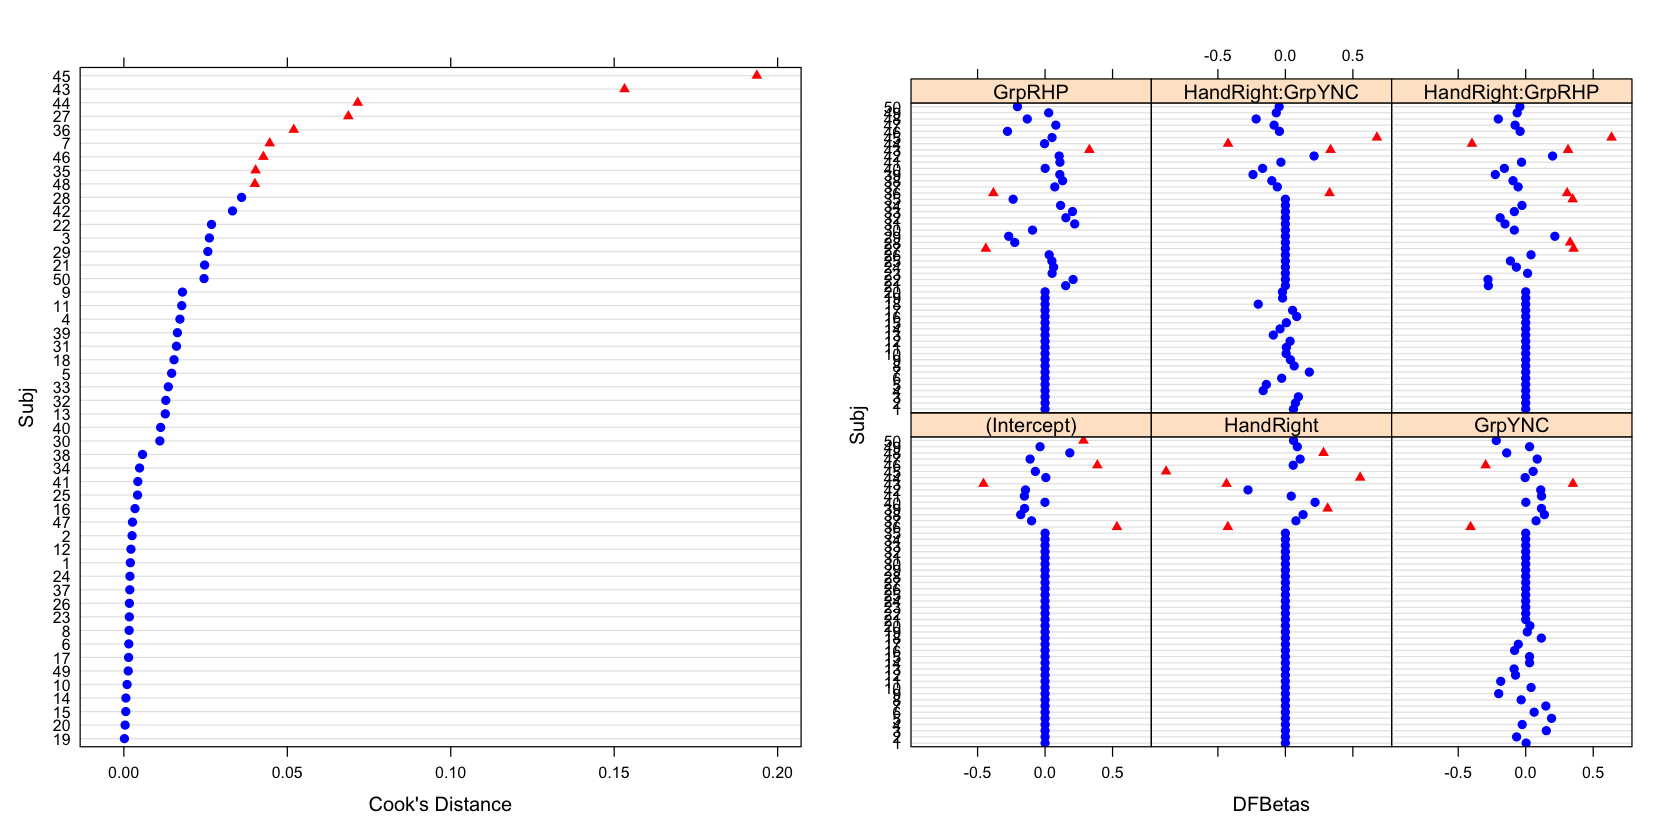

In [52]:
gMod = lmer(g ~ 1 + Hand + Grp + Hand*Grp + (1| Subj), MMEstGains)
estex = influence(gMod,"Subj")

options(repr.plot.width = 14, repr.plot.height = 7)

diagGp1 = as.ggplot(~plot(estex, which="cook",cutoff=.04, sort=TRUE,xlab="Cook's Distance",ylab = "Subj"))
diagGp2 = as.ggplot(~plot(estex, which="dfbetas",cutoff=.28, xlab="DFBetas",ylab = "Subj"))

diagGp1|diagGp2

In [53]:
estex.obs <- influence(gMod, obs=TRUE) 
cks.d <- cooks.distance(estex.obs, parameter=3) 
outliers = which(cks.d > 4/100)

gMod2 = exclude.influence(gMod,"Subj",outliers)


### Robust LMER to compare *g* between groups and hands 

#### Comparing *g* between YNC & LHP

In [54]:
# SET REFERENCE
MMEstGains$Hand <- factor(MMEstGains$Hand, ordered = FALSE)
MMEstGains$Hand <- relevel(MMEstGains$Hand, "Right")
MMEstGains$Grp <- relevel(MMEstGains$Grp, "LHP")

# RUN ROBUST MODEL
robust.model1L = rlmer(g ~ Hand + Grp + Hand:Grp + (1 | Subj), MMEstGains %>% filter(Grp != "RHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model1L, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model1L, specs = pairwise ~ Grp | Hand)$contrasts)


,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,LHP,-0.02583499,0.03128241,Inf,-0.8258633,4.088816e-01
2,Right - Left,YNC,0.40218868,0.02709136,Inf,14.8456442,7.423821e-50


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LHP - YNC,Right,-0.03229614,0.05213391,Inf,-0.6194844,5.355973e-01
2,LHP - YNC,Left,0.39572753,0.05213391,Inf,7.5905983,3.184317e-14


#### Comparing *g* between YNC & RHP

In [55]:
# SET REFERENCE
MMEstGains$Hand <- factor(MMEstGains$Hand, ordered = FALSE)
MMEstGains$Hand <- relevel(MMEstGains$Hand, "Right")
MMEstGains$Grp <- relevel(MMEstGains$Grp, "RHP")

# RUN ROBUST MODEL
robust.model1R = rlmer(g ~ Hand + Grp + Hand:Grp + (1 | Subj), MMEstGains %>% filter(Grp != "LHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model1R, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model1R, specs = pairwise ~ Grp | Hand)$contrasts)


,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,RHP,-0.1649034,0.04858103,Inf,-3.394398,6.877959e-04
2,Right - Left,YNC,0.3875822,0.04207241,Inf,9.212266,3.193107e-20


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RHP - YNC,Right,-0.09119309,0.0454434,Inf,-2.00674,4.477734e-02
2,RHP - YNC,Left,0.46129252,0.0454434,Inf,10.15093,3.282355e-24


## Trial-to-trial analysis (acf)

### Read Data

In [56]:
colnames(data)[1] = "Grp"
data  %>% 
filter(CondG==c("BmC")) %>% 
filter(Hand!="cursor") %>% 
mutate(Trial = as.numeric(Trial)) %>% 
select(Grp,Subj,SubNo,Cond,Dist,Hand,Trial,PVDE,XPosPV,YPosPV) %>% 

unite(col = "group",Grp,Subj,SubNo,Cond,Dist,Hand) %>% 
select(group,Trial,PVDE,XPosPV,YPosPV)   %>% 
{.->> ctrlDataF}

head(ctrlDataF)


,group,Trial,PVDE,XPosPV,YPosPV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,YNC_Subj001_1_BmC05_5_left,1,-10.32452,0.9226155,1.041448
2,YNC_Subj001_1_BmC05_5_left,2,-6.41764,0.9346758,1.026062
3,YNC_Subj001_1_BmC05_5_left,3,-10.41785,0.9284034,1.032699
4,YNC_Subj001_1_BmC05_5_left,4,-19.34386,0.9109158,1.035750
5,YNC_Subj001_1_BmC05_5_left,5,-9.36932,0.9108948,1.021032
6,YNC_Subj001_1_BmC05_5_left,6,-22.25910,0.9029615,1.028811


### Computing Mahalanobis distance & lagged PVDE to determine fast learning

In [57]:
names = unique(ctrlDataF$group)

mahals = vector()
datLags = vector()

for (i in names)

    {dat = ctrlDataF[ctrlDataF$group == i,]
     
     datLag = lag(dat$PVDE,1)
     datLags = c(datLags,datLag)
     
     mahal = mahalanobis(dat[,4:5], 
                    colMeans(dat[,4:5]),
                    cov(dat[,4:5]))
     mahals = c(mahals,mahal)
    }

lagPVDE = datLags

ctrlDataNew = data.frame(ctrlDataF,lagPVDE,mahals)

ctrlDataNew  %>% 
separate(col = group, into = c("Grp","Subj","SubNo","Cond","Dist","Hand"),sep = "_")   %>% 
{.->>ctrlDataNew4reg}

ctrlDataNew4reg$Grp = factor(ctrlDataNew4reg$Grp, levels=c('YNC','RHP','LHP'))
head(ctrlDataNew4reg)



,Grp,Subj,SubNo,Cond,Dist,Hand,Trial,PVDE,XPosPV,YPosPV,lagPVDE,mahals
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YNC,Subj001,1,BmC05,5,left,1,-10.32452,0.9226155,1.041448,NA,6.186850
2,YNC,Subj001,1,BmC05,5,left,2,-6.41764,0.9346758,1.026062,-10.32452,4.462720
3,YNC,Subj001,1,BmC05,5,left,3,-10.41785,0.9284034,1.032699,-6.41764,3.160088
4,YNC,Subj001,1,BmC05,5,left,4,-19.34386,0.9109158,1.035750,-10.41785,2.501502
5,YNC,Subj001,1,BmC05,5,left,5,-9.36932,0.9108948,1.021032,-19.34386,1.138511
6,YNC,Subj001,1,BmC05,5,left,6,-22.25910,0.9029615,1.028811,-9.36932,2.812689


### Select PVDE for ACF analysis

In [58]:
ctrlDataNew4reg  %>% 
filter(Trial!=1:5) %>%
select(SubNo,Trial,Dist,Hand,PVDE) %>% 
pivot_wider(id_cols=NULL,names_from = Hand,values_from = PVDE) %>% 
{.->>ctrlDataNew4ACF}

head(ctrlDataNew4ACF)


SubNo,Trial,Dist,left,right
<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,6,5,-22.25910,2.23242
1,7,5,-17.25457,8.54909
1,8,5,-18.71507,4.56551
1,9,5,-23.68392,9.18148
1,10,5,-19.89913,16.52577
1,11,5,-7.35605,8.36514


### All subjects ACFs

In [61]:
acfL = vector()
acfR = vector()

SubjID = vector()

for (i in ctrlDataNew4ACF$SubNo) {
    acfL[i] = acf(ctrlDataNew4ACF$left[ctrlDataNew4ACF$SubNo == i], lag.max = 1,
        plot = FALSE)$acf[2]
    acfR[i] = acf(ctrlDataNew4ACF$right[ctrlDataNew4ACF$SubNo == i], lag.max = 1,
        plot = FALSE)$acf[2]
    SubjID[i] = i
}


acf = data.frame(acfL, acfR)

colnames(acf)[1] <- "Left"
colnames(acf)[2] <- "Right"
# colnames(acf)[3] <- 'Cursor'


j = c(matrix("YNC", 20), matrix("RHP", 15), matrix("LHP", 15))  #,

acfData = data.frame(SubjID, data.frame(j), acf)

colnames(acfData)[2] = "Grp"

acfData %>%
    pivot_longer(cols = c("Left", "Right"), "Hand", values_to = "acf_coeff") %>%

{
    acfData2 <<- .
}

acfData2$Grp = factor(acfData2$Grp, levels = c("LHP", "YNC", "RHP"))


### *acf* Single Represesentative Subject

In [62]:
eg = 1;
remT = c(1:5)

ctrlDataNew4reg %>% 
select(SubNo,Trial,Dist,Hand,PVDE,lagPVDE) %>% 
filter(SubNo==eg) %>% 

{.->> sub1Dat}
head(sub1Dat,3)


lefteg = acf(ctrlDataNew4ACF$left[ctrlDataNew4ACF$SubNo == eg], plot = FALSE)
righteg = acf(ctrlDataNew4ACF$right[ctrlDataNew4ACF$SubNo == eg], plot = FALSE)
subjACF = data.frame(lefteg$lag, lefteg$acf, righteg$acf)


colnames(subjACF)[1] <- "Lag"
colnames(subjACF)[2] <- "Left"
colnames(subjACF)[3] <- "Right"

subjACF %>%
    pivot_longer(cols = c(Left, Right), names_to = "Hand", values_to = "acf") %>% 
    filter(Lag<8) %>% 
    {subjACF <<- .}


,SubNo,Trial,Dist,Hand,PVDE,lagPVDE
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,1,1,5,left,-10.32452,NA
2,1,2,5,left,-6.41764,-10.32452
3,1,3,5,left,-10.41785,-6.41764


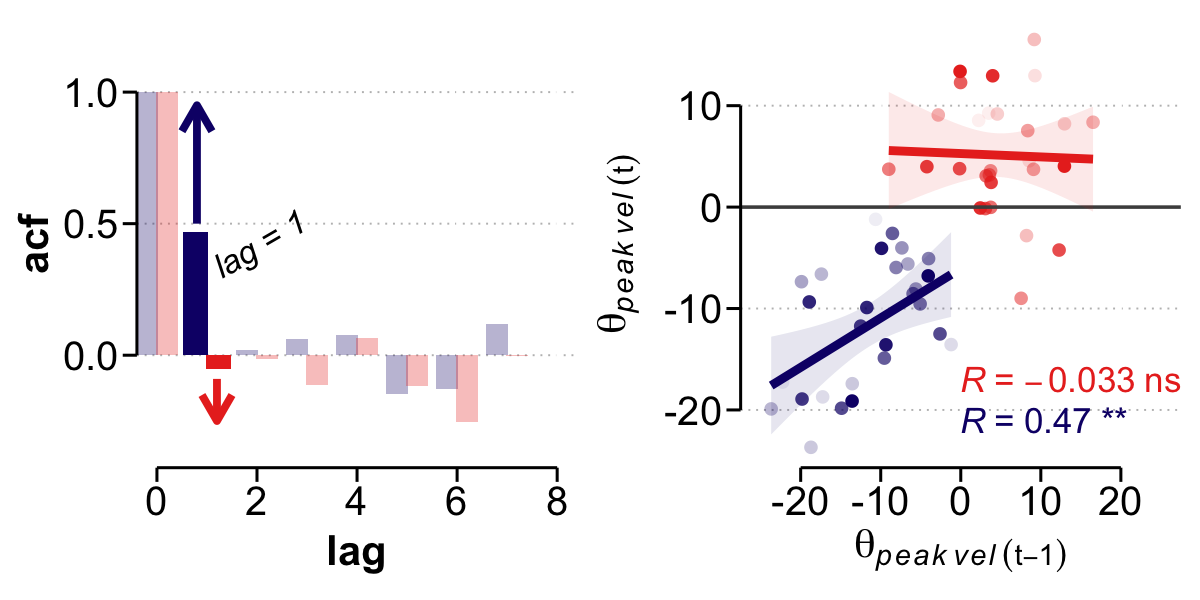

In [63]:
options(repr.plot.width = 10, repr.plot.height = 5)


#--------------------ACF PLOT-----------------------#


IndFig = ggplot(data = subjACF, aes(x = Lag, y = acf, fill = Hand)) + 
geom_bar(width = 0.9, position = position_dodge(width = 0.8), stat = "identity", show.legend = FALSE,
    alpha = 0.3) + geom_bar(data = subset(subjACF, Lag == 1), aes(x = Lag, y = acf,
    fill = Hand), width = 1, position = position_dodge(width = 0.9), stat = "identity",
    show.legend = FALSE, alpha = 1) + annotate("segment", x = 0.8, xend = 0.8, y = 0.5, yend = 0.95,
           colour = "#110176", size = 2.2, arrow = arrow()) + #type = "closed",angle = 20,ends = "last",length = unit(0.06, "npc")
annotate("segment", x = 1.2, xend = 1.2, y = -0.09, yend = -0.25,
           colour = "#E93324", size = 2.2, arrow = arrow()) +
annotate_npc("lag = 1", x = unit(c(0.28), "npc"), y = unit(c(0.5), "npc"), rot = 30, gp = gpar(fontsize = 20, fontface = 3,
        col = "black")) +
coord_capped_cart(ylim = c(-0.35, 1.2), xlim = c(0, 8), bottom = "both", left = "both") + 
    xlab("lag") + ylab("acf") + theme_pubclean() + thm + scale_color_manual(values = c("#110176",
    "#E93324")) + scale_fill_manual(values = c("#110176", "#E93324"))
# ggsave(file='IndFig_acf.svg', plot=IndFig, width=5, height=5)


#-------------------- t by (t-1) plot-----------------------#


IndFig2 = ggplot(sub1Dat %>%filter(!Trial%in%remT), aes(y = PVDE, x = lagPVDE,na.rm = TRUE)) +
       geom_point(aes(col = Hand,alpha = Trial),stroke = 0.5, size = 3.5, shape = 16, show.legend = FALSE) + 
       geom_hline(yintercept = 0,size = 1,col="gray30") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'****'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),label.x = 0, label.y = c(-21,-17), size=7.4,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-25,25),bottom = 'both', left = 'both') + 
       geom_smooth(aes(col=Hand,fill=Hand),  method = 'lm', formula = y~x, lwd=2.5,show.legend = FALSE,alpha=0.1) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_alpha("Trial",range = c(0,1),breaks = c(1:20))+
       scale_fill_manual(values=c("#110176","#E93324")) + theme_pubclean() + thm +
       xlab(expression(bold(theta) [italic(peak~vel)~(t-1)])) + 
       ylab(expression(bold(theta) [italic(peak~vel)~(t)]))

# ggsave(file="IndFig2_tbyt-1.svg", plot=IndFig2, width=5, height=5)



IndFig | IndFig2




### Mean ± SE for ACFs per group

In [64]:
options(dplyr.summarise.inform = FALSE)
options(warn = -1)
acfData2 %>%
    group_by(Grp,Hand) %>%
    summarise(mean_acf = mean(acf_coeff, na.rm = TRUE), se_acf = se(acf_coeff, na.rm = TRUE))

options(dplyr.summarise.inform = TRUE)
options(warn = 0)

Grp,Hand,mean_acf,se_acf
<fct>,<chr>,<dbl>,<dbl>
LHP,Left,0.11830890,0.04667883
LHP,Right,0.08282471,0.06191646
YNC,Left,0.25282072,0.04616468
YNC,Right,0.04451317,0.04740744
RHP,Left,-0.01402382,0.05812553
RHP,Right,0.21097437,0.04067150


### Plotting *acf* (hypothesis & results)

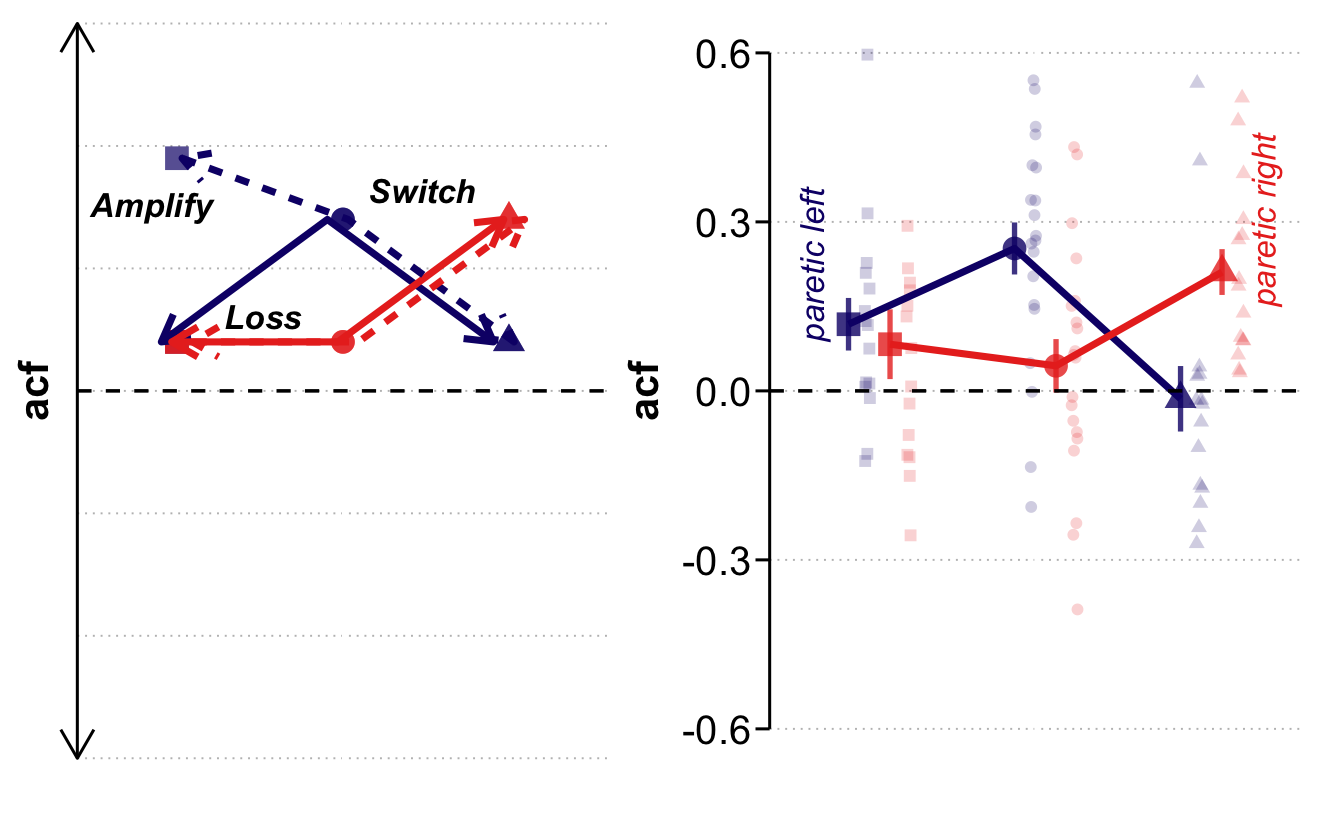

In [65]:
options(repr.plot.width=11, repr.plot.height=7)

options(warn=-1)

rs2 = ggplot(data = acfData2,aes(x = Grp, y = acf_coeff,shape=Grp,col=Hand)) +
      stat_summary(mapping = NULL, data = NULL,show.legend = FALSE,fun.data = mean_se, alpha = 0.8,geom = "pointrange", position = position_dodge(width=0.5),size=1.5,lwd=3) +
      geom_half_point_panel(aes(col=Hand),position = position_dodge(width=0.5),size=3, alpha = 0.2,show.legend = FALSE) +
      geom_line(aes(group=Hand,col=Hand),size=2,alpha = 1,stat = "summary",
                fun.data = mean_se, position = position_dodge(width=0.5),show.legend = FALSE) + 
      geom_hline(yintercept = 0,linetype = "dashed",size = 1) + 
      coord_capped_cart(ylim = c(-0.6,0.6), bottom = 'both', left = 'both') +
      xlab("") + ylab("acf")+ 
      scale_color_manual(values=c("#110176","#E93324")) + 
      scale_fill_manual(values=c("#110176","#E93324")) + 
      scale_shape_manual(values = c(15,16,17)) + 
      annotate_npc('paretic left', x = unit(c(0.08), "npc"), y = unit(c(0.67), "npc"),rot = 90, gp = gpar(fontsize = 20, fontface = 3,col = "#110176")) +
      annotate_npc('paretic right', x = unit(c(0.93), "npc"), y = unit(c(0.73), "npc"),rot = 90, gp = gpar(fontsize = 20, fontface = 3,col = "#E93324")) +
      theme_pubclean() + thm +
      theme(axis.line.x = element_line(colour = "white"),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank(),
            legend.position = "None")

Fig2m = gr2 + rs2

# ggsave(file="Fig2_acf.svg", plot=Fig2m, width=11, height=7)

Fig2m


### Simple LMER for *acf* & Model Diagnostics

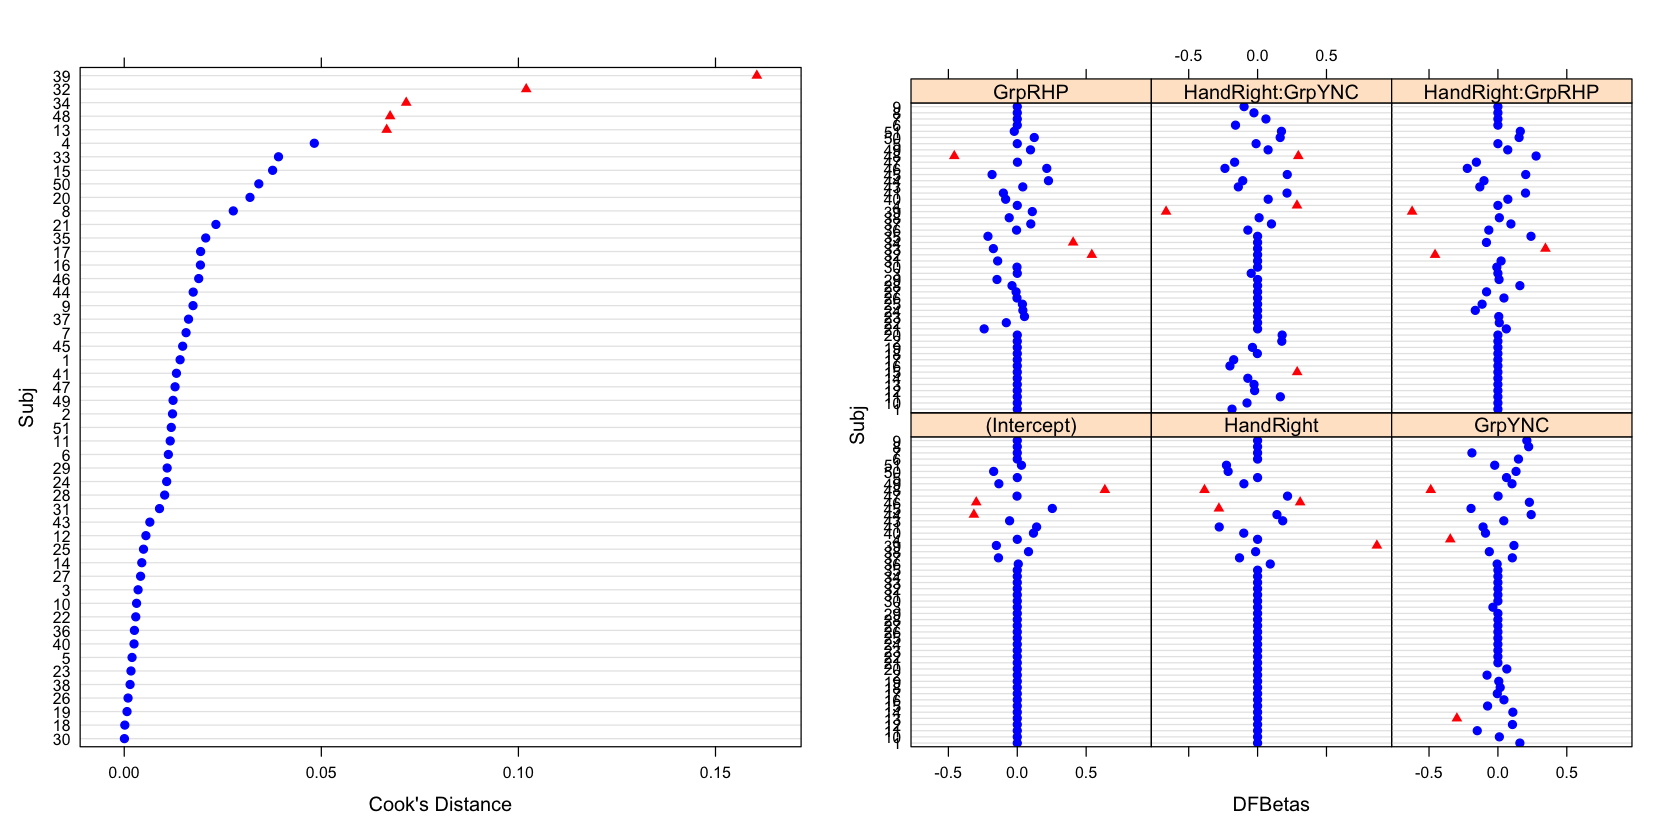

In [66]:
#LMER Model
acfMod = lmer(acf_coeff ~ 1 + Hand + Grp + Hand:Grp + (1| SubjID), acfData2)

# INFLUENTIAL DATA
estex = influence(acfMod,"SubjID")
estex.obs <- influence(acfMod, obs=TRUE) 
cks.d <- cooks.distance(estex.obs, parameter=3) 
outliers = which(cks.d > (4/70))


#PLOT
options(repr.plot.width = 14, repr.plot.height = 7)
diagACFp1 = as.ggplot(~plot(estex, which="cook",cutoff=.06, sort=TRUE,xlab="Cook's Distance",ylab = "Subj"))
diagACFp2 = as.ggplot(~plot(estex, which="dfbetas",cutoff=.28, xlab="DFBetas",ylab = "Subj"))

diagACFp1|diagACFp2


	Shapiro-Wilk normality test

data:  residuals(acfMod)
W = 0.97471, p-value = 0.05119


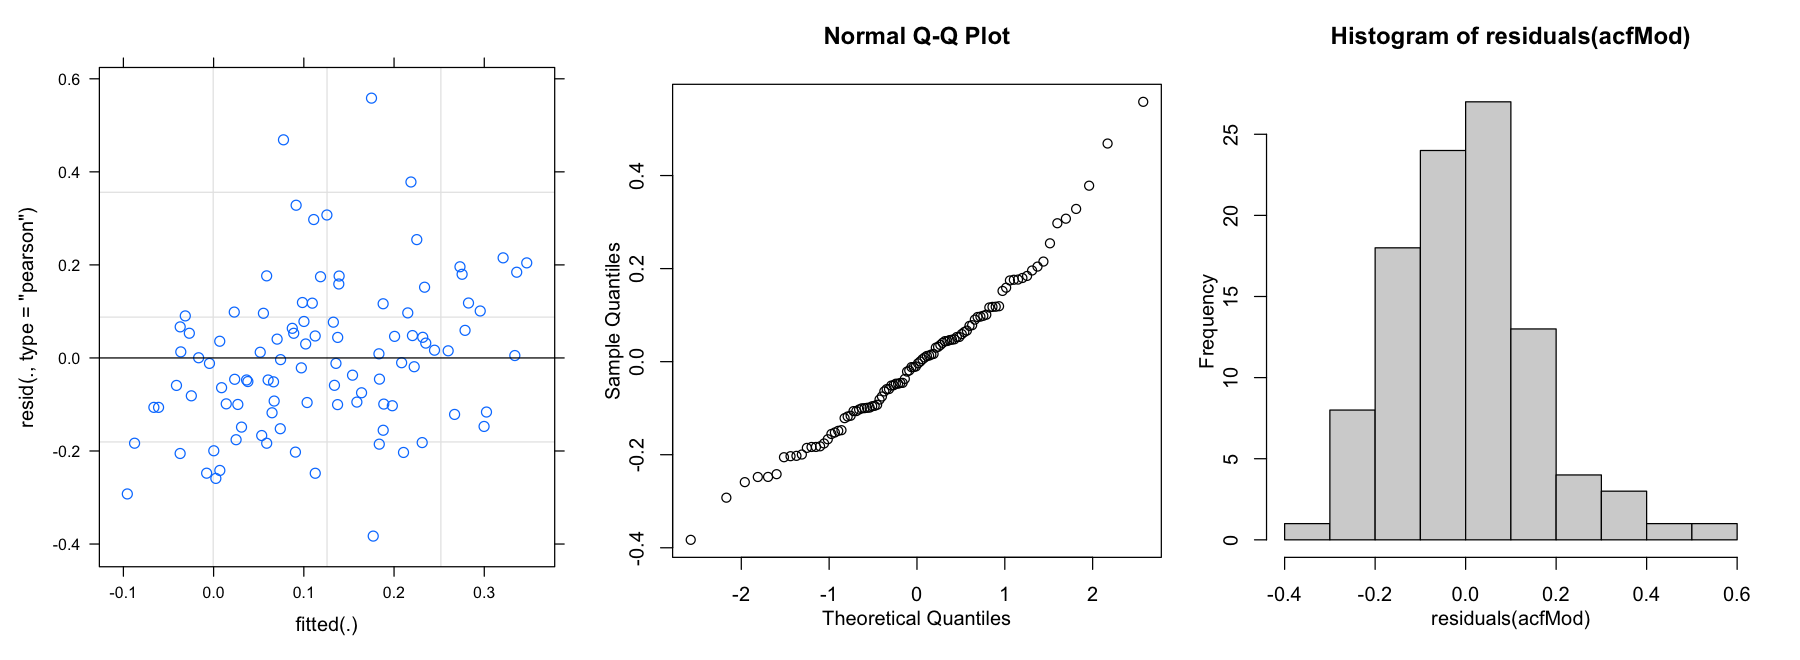

In [67]:
options(repr.plot.width = 15, repr.plot.height = 5.5)

dg1 = as.ggplot(plot(acfMod))
dg2 = as.ggplot(~qqnorm(residuals(acfMod)))
dg3 = as.ggplot(~hist(residuals(acfMod)))

dg1 | dg2 | dg3
shapiro.test(residuals(acfMod))

In [68]:
acfMod2 = exclude.influence(acfMod,"SubjID",outliers)
# summary(acfMod2)

### Robust LMER to compare *acf* between groups and hands 

#### Comparing *acf* between YNC & LHP

In [70]:
# SET REFERENCE
acfData2$Hand <- factor(acfData2$Hand, ordered = FALSE)
acfData2$Hand <- relevel(acfData2$Hand, "Right")
acfData2$Grp <- relevel(acfData2$Grp, "LHP")

# RUN ROBUST MODEL
robust.model2L = rlmer(acf_coeff ~ Hand + Grp + Hand:Grp + (1 | SubjID), acfData2 %>%
    filter(Grp != "RHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model2L, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model2L, specs = pairwise ~ Grp | Hand)$contrasts)

,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,LHP,-0.04390767,0.07320295,Inf,-0.5998073,0.5486346439
2,Right - Left,YNC,-0.22578807,0.06339561,Inf,-3.5615725,0.0003686403


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LHP - YNC,Right,0.01523264,0.06847509,Inf,0.2224552,0.82395956
2,LHP - YNC,Left,-0.16664777,0.06847509,Inf,-2.4336992,0.01494541


#### Comparing *acf* between YNC & RHP

In [71]:
# SET REFERENCE
acfData2$Hand <- factor(acfData2$Hand, ordered = FALSE)
acfData2$Hand <- relevel(acfData2$Hand, "Right")
acfData2$Grp <- relevel(acfData2$Grp, "RHP")


# RUN ROBUST MODEL
robust.model2R = rlmer(acf_coeff ~ Hand + Grp + Hand:Grp + (1 | SubjID), acfData2 %>%
    filter(Grp != "LHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model2R, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model2R, specs = pairwise ~ Grp | Hand)$contrasts)


,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,RHP,0.2557735,0.07037451,Inf,3.634462,0.0002785613
2,Right - Left,YNC,-0.2264390,0.06094612,Inf,-3.715397,0.0002028846


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RHP - YNC,Right,0.1611357,0.06582933,Inf,2.447779,1.437397e-02
2,RHP - YNC,Left,-0.3210769,0.06582933,Inf,-4.877414,1.074859e-06


## Relationship between trial-by-trial adaptive response and chronicity in RHP

In [72]:
fmchron2 = read.csv("fmchron_subj.csv", stringsAsFactors = FALSE)
acfData %>%
    filter(Grp != "YNC") %>%
    data.frame(., fmchron2[-22, ]) %>%
    filter(Grp == "RHP") %>%
    pivot_longer(cols = c(Left, Right), names_to = "Hand", values_to = "acf") %>%
    {
        forPlots2 <<- .
    }

colnames(forPlots2)[3] = "chron"
head(forPlots2)


SubjID,Grp,chron,uefm,ehi,Hand,acf
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
21,RHP,141,59,100,Left,-0.27089352
21,RHP,141,59,100,Right,0.03707393
22,RHP,95,47,90,Left,-0.10022453
22,RHP,95,47,90,Right,0.13830222
23,RHP,63,51,100,Left,0.04269213
23,RHP,63,51,100,Right,0.27618591


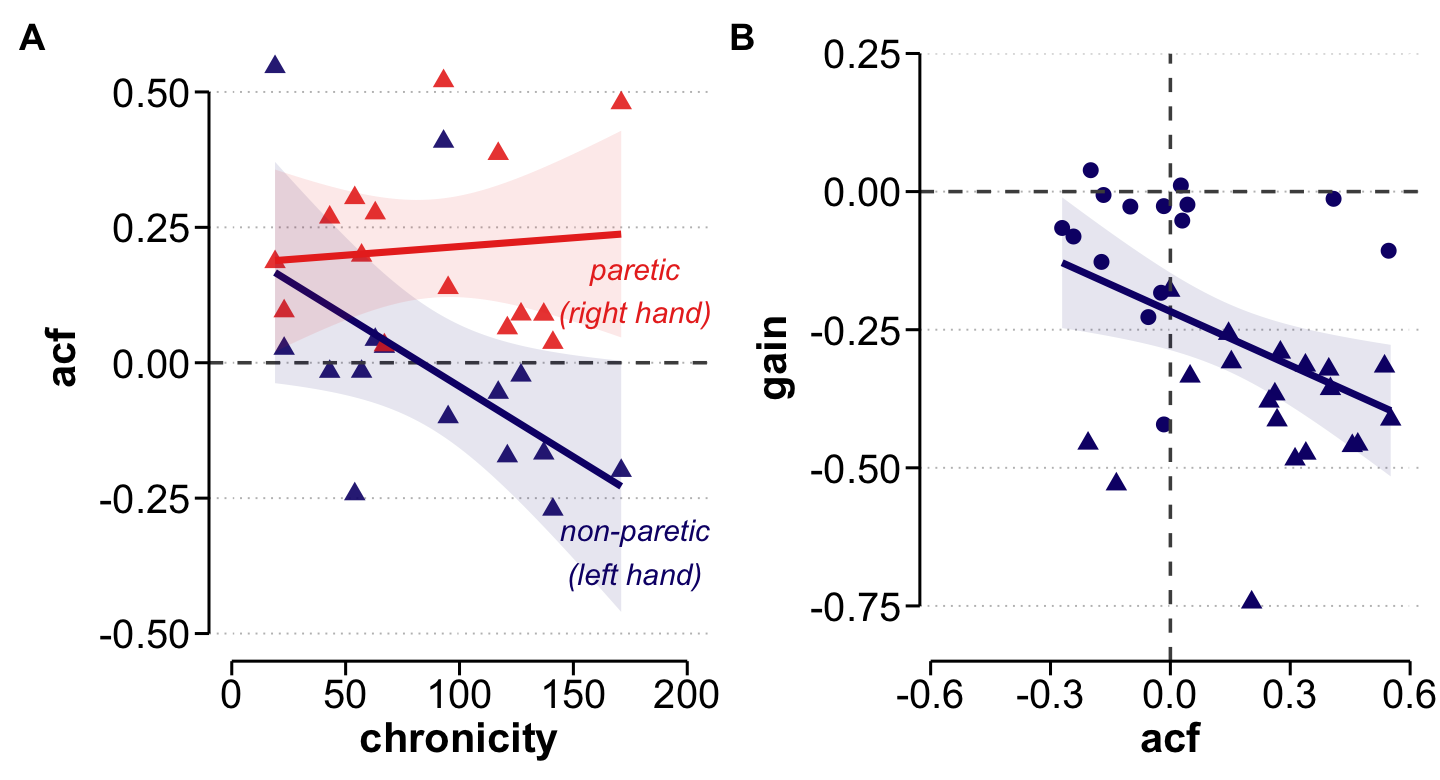

In [98]:
all = data.frame(acfData2,MMEstGains)
# all %>% filter(Grp!="LHP") %>% {.->>all2}
# head(all)
all$Hand = factor(all$Hand, levels=c('Left','Right'),labels = c("Left Hand","Right Hand"))

options(repr.plot.width=12, repr.plot.height=6.5)

Fig3a = ggplot(forPlots2, aes(y = acf, x = chron)) +
       geom_point(aes(col = Hand),stroke = 1.5, alpha = 0.9, size = 3.5, shape = 17, show.legend = FALSE) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       coord_capped_cart(xlim = c(0,200),ylim = c(-0.5,0.52),bottom = 'both', left = 'both') + 
       geom_smooth(aes(col=Hand,fill=Hand),  method = 'lm', formula = y~x, lwd=2,show.legend = FALSE,alpha=0.1) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + theme_pubclean() + thm +
       annotate_npc("paretic\n(right hand)", x = unit(c(0.85), "npc"), 
                    y = unit(c(0.61), "npc"), 
                    gp = gpar(fontsize = 18, fontface = 3,col = "#E93324")) +
       annotate_npc("non-paretic\n(left hand)", x = unit(c(0.85), "npc"), 
                    y = unit(c(0.18), "npc"),
                    gp = gpar(fontsize = 18, fontface = 3,col = "#110176")) +
       xlab("chronicity") + ylab("acf")

Fig3b = ggplot(all %>% filter(Grp!="LHP" & Hand=="Left Hand"), aes(x = acf_coeff, y = g)) +
       geom_point(aes(shape = Grp),stroke = 1.5, col="#110176",alpha = 1, size = 3.5, show.legend = FALSE) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_smooth(col="#110176",fill="#110176", method = 'lm', formula = y~x, lwd=2,show.legend = FALSE,alpha=0.1) +  
#        facet_grid(~Hand) +  #stat_ellipse(aes(group=Grp)) +
# stat_cor(method="spearman",size = 7) +
       coord_capped_cart(ylim = c(-0.8,0.2),xlim = c(-0.57,0.57), bottom = 'both', left = 'both') + 
      scale_shape_manual(values = c(16,17)) + 
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + 
   theme_pubclean() + thm +
       ylab("gain") + xlab("acf")

Fig4 = Fig3a + Fig3b + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 22))
Fig4
# ggsave(file="Fig4.svg", plot=Fig4, width=12, height=6.5)


In [75]:
chron_LRN = lmer(acf ~ chron:Hand + (1 | SubjID), data = forPlots2)
table4 = tab_model(chron_LRN, show.stat = TRUE)
display_html(head(table4$page.complete))

acf 
 
 
 Predictors 
 Estimates 
 CI 
 Statistic 
 p 
 
 
 (Intercept) 
 0.20 
 0.03 – 0.37 
 2.33 
 0.020 
 
 
 chron * HandLeft 
 -0.00 
 -0.00 – -0.00 
 -2.72 
 0.007 
 
 
 chron * HandRight 
 0.00 
 -0.00 – 0.00 
 0.19 
 0.849 
 
 
 Random Effects 
 

 
 σ 2 
 0.02 

 
 τ 00 SubjID 
 0.01 

 
 ICC 
 0.38 

 
 N SubjID 
 15 
 
 Observations 
 30 
 
 
 Marginal R 2 / Conditional R 2 
 0.385 / 0.617

## Cursor error comparisons between groups

In [76]:
data  %>% 
filter(CondG==c("BmC")) %>% 
filter(Hand=="cursor")  %>%
select(Grp,Subj,CondG,SubNo,Cond,Dist,Hand,Trial,IDE,PVDE) %>% 
group_by(Subj,CondG) %>% 
mutate(meanIDE = mean(IDE),meanPVDE = mean(PVDE)) %>% 
distinct(Subj,Grp,CondG,meanIDE,meanPVDE) %>% 
{.->>cursorErrPlot}
cursorErrPlot$Grp = factor(cursorErrPlot$Grp, levels = c("LHP", "YNC", "RHP"))
cursorErrPlot$CondG <- as.factor(cursorErrPlot$CondG)
cursorErrPlot$CondG = factor(cursorErrPlot$CondG, levels = c("BmC", "BmS"),labels = c("One Cursor","Two Cursors"))

head(cursorErrPlot)

Grp,Subj,CondG,meanIDE,meanPVDE
<fct>,<chr>,<fct>,<dbl>,<dbl>
YNC,Subj001,One Cursor,-3.1503930,-0.3632224
YNC,Subj002,One Cursor,-8.3391708,-7.3970882
YNC,Subj003,One Cursor,-1.1538569,-0.6782084
YNC,Subj004,One Cursor,-5.9896416,-6.2597010
YNC,Subj005,One Cursor,-0.2557512,-1.1746078
YNC,Subj006,One Cursor,-4.3837268,-2.0762970


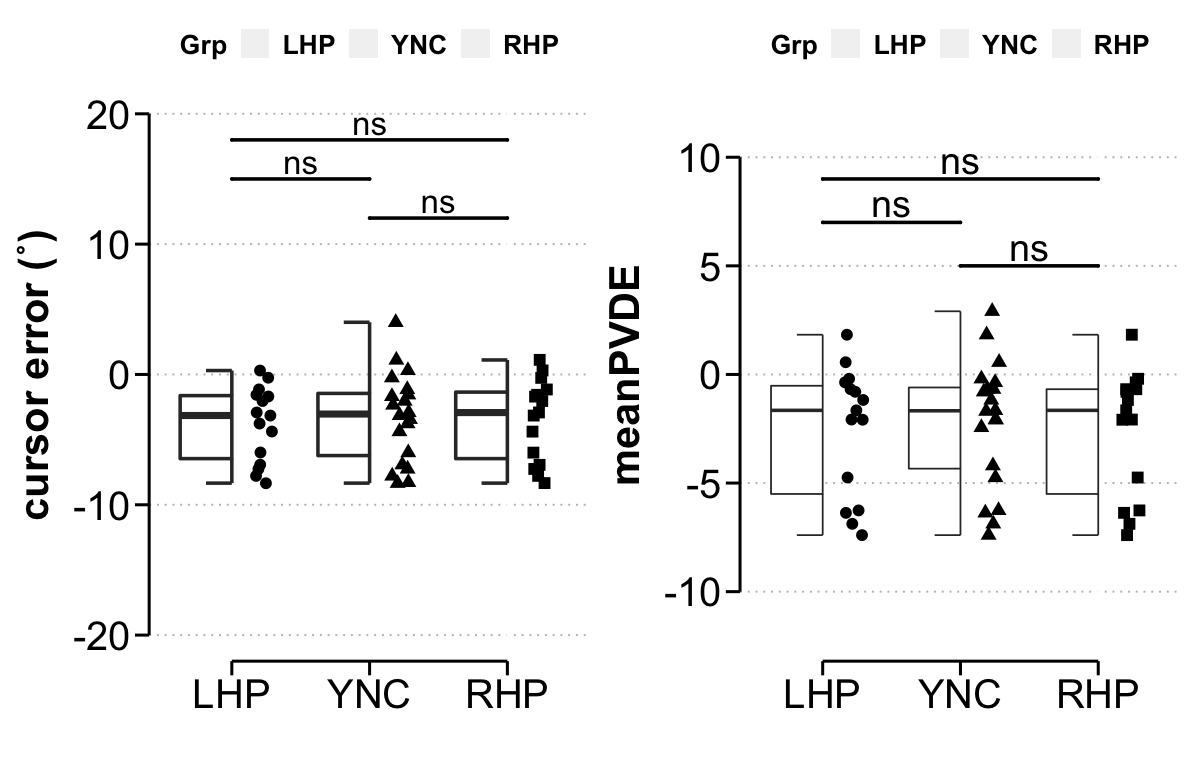

In [77]:
options(repr.plot.width=10, repr.plot.height=6.5)
comp = list(c("YNC","RHP"),c("YNC","LHP"),c("LHP","RHP"))

meanIDE = ggplot(data = cursorErrPlot,aes(x = Grp, y = meanIDE,shape=Grp)) +
geom_half_boxplot(size = 1,show.legend = FALSE) + geom_half_point_panel(size = 3,show.legend = FALSE) +
xlab("")+ ylab("cursor error (˚)") + 
coord_capped_cart(ylim = c(-20,20),bottom = "both", left = "both") +
stat_compare_means(comparisons = comp,label.y = c(12,15,18), na.rm = TRUE,label = "p.signif",
                   size=7,face="bold",bracket.size = 1,tip.length = 0.0) +  #facet_grid(~CondG)+
theme_pubclean() + thm

meanPVDE = ggplot(data = cursorErrPlot,aes(x = Grp, y = meanPVDE,shape=Grp)) +
geom_half_boxplot(show.legend = FALSE) + xlab("")+
coord_capped_cart(ylim = c(-12,12),bottom = "both", left = "both") +
stat_compare_means(comparisons = comp,label.y = c(5,7,9), na.rm = TRUE,label = "p.signif",
                   hide.ns = FALSE,vjust = 0, 
                    symnum.args=list(cutpoints = c(0.001, 0.01, 0.05,Inf),symbols = c("***", "**", "ns")),
                   size=8,face="bold",bracket.size = 1,tip.length = 0.0) +  
geom_half_point_panel(size = 3,show.legend = FALSE) + theme_pubclean() + thm
# ggsave(file="S3.svg", plot=meanIDE, width=10, height=6.5)


meanIDE | meanPVDE


## Non-Paretic Left Hand Error

In [78]:
data  %>% 
filter(CondG==c("BmC")) %>% 
filter(Hand=="left")  %>%
filter(Grp!="LHP") %>% 
select(Grp,Subj,Hand,CondG,SubNo,Cond,Dist,Hand,Trial,IDE,PVDE) %>% 
group_by(Grp,Subj,Hand) %>%    
mutate(meanIDE = mean(IDE),meanPVDE = mean(PVDE)) %>% 
distinct(Subj,Grp,Hand,CondG,meanIDE,meanPVDE) %>% 
{.->>LhandErrPlot}
LhandErrPlot$Grp = factor(LhandErrPlot$Grp, levels = c("LHP", "YNC", "RHP"))

head(LhandErrPlot)

Grp,Subj,Hand,CondG,meanIDE,meanPVDE
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>
YNC,Subj001,left,BmC,-7.348676,-11.3099125
YNC,Subj002,left,BmC,-22.905913,-21.5431340
YNC,Subj003,left,BmC,11.654869,2.6080192
YNC,Subj004,left,BmC,-8.591172,-15.7508540
YNC,Subj005,left,BmC,1.882509,-0.8127948
YNC,Subj006,left,BmC,-5.524778,-9.9725552


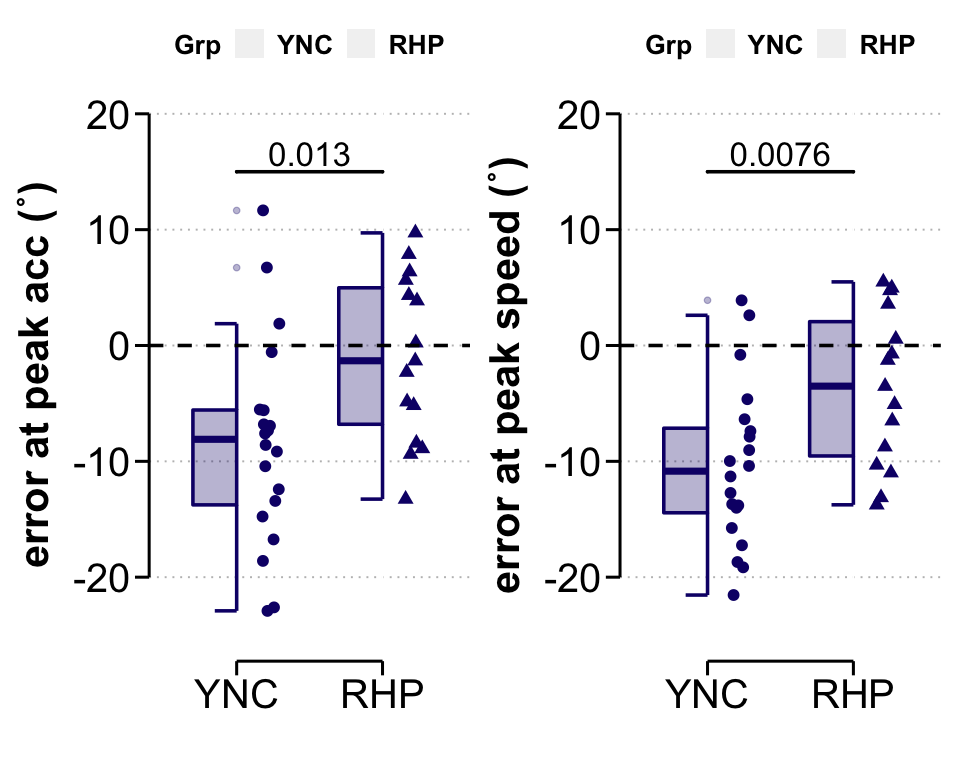

In [79]:
options(repr.plot.width=8, repr.plot.height=6.5)
comp = list(c("YNC","RHP"))

LIDE = ggplot(data = LhandErrPlot,aes(x = Grp, y = meanIDE,shape=Grp)) +
geom_half_boxplot(col="#110176",fill="#110176",alpha = .3,size = 1,width = 0.6,show.legend = FALSE) + 
geom_half_point_panel(col="#110176",size = 3,show.legend = FALSE)+
geom_hline(yintercept = 0,col="black",lty="dashed",lwd=1) + 
xlab("")+ ylab("error at peak acc (˚)") + 
coord_capped_cart(ylim = c(-25,20),bottom = "both", left = "both") +
stat_compare_means(comparisons = comp,label.y = c(15), na.rm = TRUE,
                   size=7,face="bold",bracket.size = 1,tip.length = 0.0) + 
theme_pubclean() + thm

LPVDE = ggplot(data = LhandErrPlot,aes(x = Grp, y = meanPVDE,shape=Grp)) +
geom_half_boxplot(col="#110176",fill="#110176",alpha = 0.3,size = 1,width = 0.6,show.legend = FALSE) + 
geom_half_point_panel(col="#110176",size = 3,show.legend = FALSE)+
geom_hline(yintercept = 0,col="black",lty="dashed",lwd=1) + 
xlab("")+ ylab("error at peak speed (˚)") + 
coord_capped_cart(ylim = c(-25,20),bottom = "both", left = "both") +
stat_compare_means(comparisons = comp,label.y = c(15), na.rm = TRUE,
                   size=7,face="bold",bracket.size = 1,tip.length = 0.0) + 
theme_pubclean() + thm

LErrFig = LIDE | LPVDE

# ggsave(file="S4.svg", plot=LErrFig, width=8, height=6.5)

LErrFig

***
## For PNAS Revisions
****

### Within trial gains, direction of causality

#### In individual correlation plots, switching x and y (theta_cursor with delta_theta)

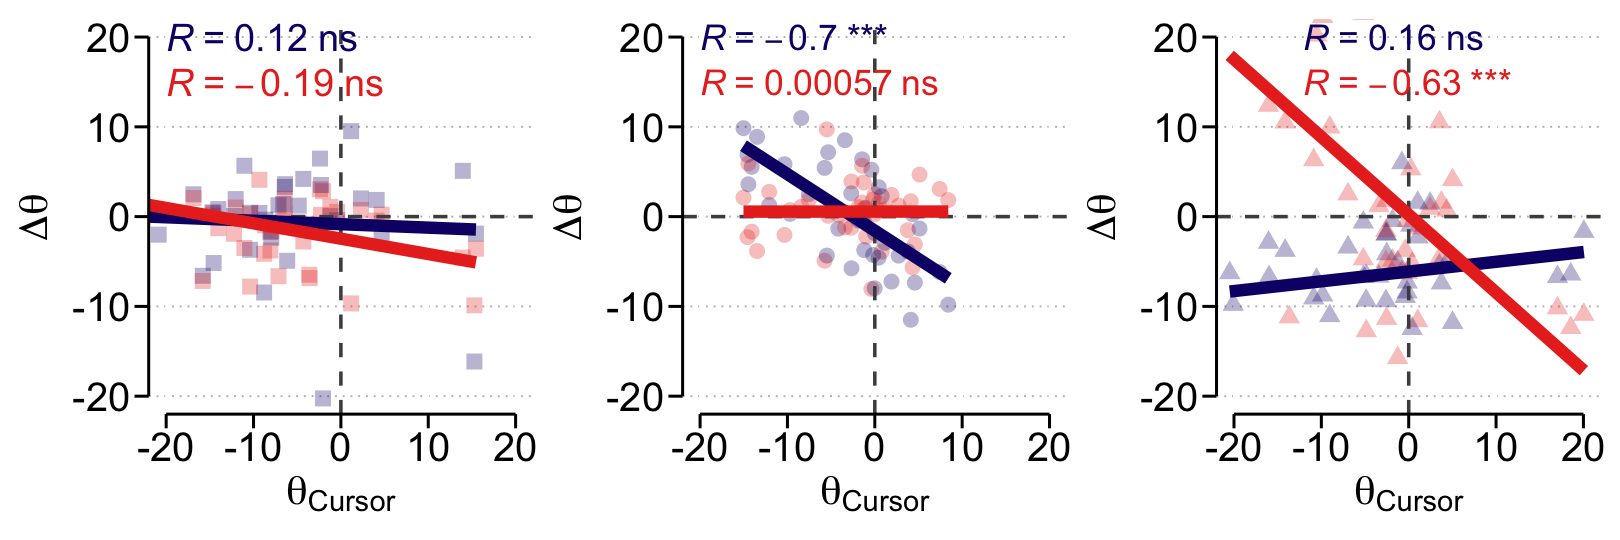

In [80]:
options(repr.plot.width = 13.5, repr.plot.height = 4.5)

Ind_subjGL = 
ggplot(bmCData2 %>% filter(Grp=="LHP" & Subj=="Subj006"), aes(y = Adjustment, x = IDE_cursor,na.rm = TRUE,group = Hand)) +
       geom_point(aes(col = Hand),stroke = 1.5, size = 3.5, shape = 15, show.legend = FALSE,alpha = 0.3) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'****'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),method="spearman",label.x = -20, label.y = c(20,15), size=8,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-20,20),bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand),  method = 'lm', fill=NA,formula = y~x, lwd=3.5,show.legend = FALSE,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + 
       scale_alpha_manual(values = c(0.7, 0.2)) +
       theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjL.svg', plot=Ind_subjGL, width=4.5, height=4.5)

Ind_subjG = 
ggplot(bmCData2 %>% filter(SubNo==14), aes(y = Adjustment, x = IDE_cursor,na.rm = TRUE)) +
       geom_point(aes(col = Hand),stroke = 1.5, alpha = 0.3, size = 3.5, shape = 16, show.legend = FALSE) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),label.x = -20, label.y = c(20,15),size=7.5,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-20,20), bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand,fill=Hand), fill=NA,method = 'lm', formula = y~x, lwd=3.5,show.legend = FALSE,alpha=0.1,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjG.svg', plot=Ind_subjG, width=4.5, height=4.5)

Ind_subjGR = 
ggplot(bmCData2 %>% filter(SubNo==22), aes(y = Adjustment, x = IDE_cursor,na.rm = TRUE,group = Hand)) +
       geom_point(aes(col = Hand),stroke = 1.5, size = 3.5, shape = 17, show.legend = FALSE,alpha = 0.3) + 
       geom_hline(yintercept = 0,size = 1,col="gray30",lty="dashed") + 
       geom_vline(xintercept = 0,size = 1,col="gray30",lty="dashed") + 
       stat_cor(aes(group = Hand,col=Hand,label =paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")),
                                                       sep = "~")),digits=2,label.x = -12, label.y = c(20,15), size=7.5,show.legend = FALSE) + 
       coord_capped_cart(xlim = c(-20,20),ylim = c(-20,20),bottom = 'both', left = 'both') + #facet_wrap(~Hand,ncol=2) +
       geom_smooth(aes(col=Hand),  method = 'lm', fill=NA,formula = y~x, lwd=3.5,show.legend = FALSE,fullrange=TRUE) +  
       scale_color_manual(values=c("#110176","#E93324")) +
       scale_fill_manual(values=c("#110176","#E93324")) + 
       theme_pubclean() + thm +
       theme(panel.spacing.x=unit(-2, "lines")) + 
       theme(strip.text.x = element_text(size=0)) + theme(strip.background = element_blank(), strip.text = element_blank()) +
       ylab(expression(bold(Delta*theta))) + 
       xlab(expression(bold(theta)[Cursor]))

# ggsave(file='Ind_subjR.svg', plot=Ind_subjGR, width=4.5, height=4.5)

Ind_subjGALL = Ind_subjGL | Ind_subjG | Ind_subjGR

# ggsave(file='Ind_subjGALL.svg', plot=Ind_subjGALL, width=13.5, height=4.5)
Ind_subjGALL



#### In mixed effects models, switching x and y (adjustment with IDE_cursor). 
* Adjustment varies by Hand and moderates the relationship with IDE_cursor, so 'Hand' included as FE and RE. 
* Value of *g* does change from switching the x and y, but all main results still present. 
* Interestingly, it seems more clear that the negative gains are present for both hands in YNC, i.e., both hands contribute to correction within trial, just Left > Right. This is what was suggested by R2 as well & Dr. G. 
* In the right hemisphere stroke group, there is less compensation with both hands compared to YNC. This is why we refer to this as a "loss". Is there a better alternative word?

In [81]:
mixedModEstInter = suppressMessages(lmer(data = bmCData2, Adjustment ~   Hand + Grp + Grp:Hand:IDE_cursor +
    (1 + Hand + Hand:Grp:IDE_cursor| SubNo)))

coefs <- coef(summary(mixedModEstInter))
data.frame(coefs[, 1:2])


,Estimate,Std..Error
,<dbl>,<dbl>
(Intercept),-3.23579080,0.62795809
HandRight,5.61664172,0.86582681
GrpRHP,-0.06377817,0.67888420
GrpLHP,0.06018070,0.70039911
HandLeft:GrpYNC:IDE_cursor,-0.37724657,0.05020927
HandRight:GrpYNC:IDE_cursor,-0.23720165,0.07155430
HandLeft:GrpRHP:IDE_cursor,-0.09902340,0.04606562
HandRight:GrpRHP:IDE_cursor,-0.40718847,0.07530568
HandLeft:GrpLHP:IDE_cursor,-0.08474197,0.04442909


In [82]:
Left = c(coef(mixedModEstInter)$SubNo[1:20,"HandLeft:GrpYNC:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[21:32,"HandLeft:GrpRHP:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[44:47,"HandLeft:GrpRHP:IDE_cursor"],         
         coef(mixedModEstInter)$SubNo[33:43,"HandLeft:GrpLHP:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[48:50,"HandLeft:GrpLHP:IDE_cursor"])

Right = c(coef(mixedModEstInter)$SubNo[1:20,"HandRight:GrpYNC:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[21:32,"HandRight:GrpRHP:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[44:47,"HandRight:GrpRHP:IDE_cursor"],         
         coef(mixedModEstInter)$SubNo[33:43,"HandRight:GrpLHP:IDE_cursor"],
         coef(mixedModEstInter)$SubNo[48:50,"HandRight:GrpLHP:IDE_cursor"])


Grp = c(matrix('YNC',20),matrix('RHP',15),matrix('LHP',15)) #,

Subj = c(1:length(Left))
Slopes = data.frame(Subj,Grp,Left,Right)

# Pivot data table for analysis & plotting
Slopes  %>% 
pivot_longer(cols = c(Left,Right),names_to = "Hand",values_to = "g")  %>% 
{.->>MMEstGains}
MMEstGains$Grp = factor(MMEstGains$Grp, levels=c('LHP','YNC','RHP'))
head(MMEstGains)


Subj,Grp,Hand,g
<int>,<fct>,<chr>,<dbl>
1,YNC,Left,-0.45767043
1,YNC,Right,-0.36023260
2,YNC,Left,-0.25721714
2,YNC,Right,-0.06565796
3,YNC,Left,-0.74347454
3,YNC,Right,-0.14888867


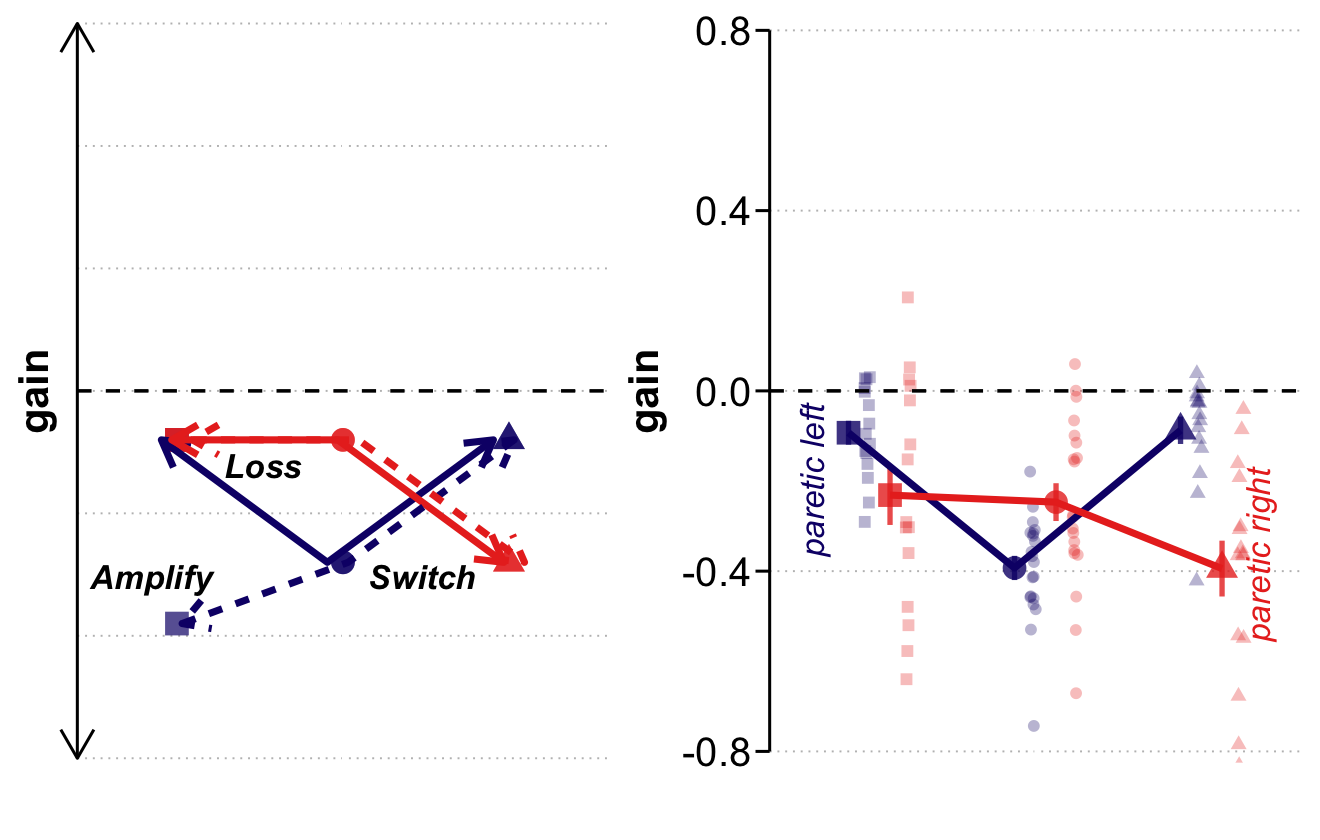

In [83]:
options(repr.plot.width = 11, repr.plot.height = 7)
options(warn = -1)

rs1 = ggplot(data = MMEstGains, aes(x = Grp, y = g, shape = Grp, col = Hand)) + stat_summary(mapping = NULL,
    data = NULL, fun.data = mean_se, alpha = 0.8, geom = "pointrange", position = position_dodge(width = 0.5),
    size = 1.5, lwd = 3, show.legend = FALSE) + geom_half_point_panel(aes(col = Hand),
    size = 3, alpha = 0.3, position = position_dodge(width = 0.5), show.legend = FALSE) +
    geom_line(aes(group = Hand, col = Hand), size = 2, fun.data = mean_se, alpha = 1,
        position = position_dodge(width = 0.5), stat = "summary", show.legend = FALSE) +
    geom_hline(yintercept = 0, linetype = "dashed", size = 1) + coord_capped_cart(ylim = c(-0.75,
    0.75), bottom = "both", left = "both") + xlab("") + ylab("gain") + annotate_npc("paretic left",
    x = unit(c(0.08), "npc"), y = unit(c(0.38), "npc"), rot = 90, gp = gpar(fontsize = 20,
        fontface = 3, col = "#110176")) + annotate_npc("paretic right", x = unit(c(0.92),
    "npc"), y = unit(c(0.28), "npc"), rot = 90, gp = gpar(fontsize = 20, fontface = 3,
    col = "#E93324")) + scale_color_manual(values = c("#110176", "#E93324")) + scale_fill_manual(values = c("#110176",
    "#E93324")) + scale_shape_manual(values = c(15, 16, 17)) + theme_pubclean() +
    thm + theme(axis.line.x = element_line(colour = "white"), axis.text.x = element_blank(),
    axis.ticks.x = element_blank(), legend.position = "none")


Fig1 = gr1 + rs1

# ggsave(file = "Fig1_gain.svg", plot = Fig1, width = 11, height = 7)

Fig1
options(warn = 0)

#### Robust LMER to compare *g* between groups and hands 

##### Comparing *g* between YNC & LHP

In [84]:
# SET REFERENCE
MMEstGains$Hand <- factor(MMEstGains$Hand, ordered = FALSE)
MMEstGains$Hand <- relevel(MMEstGains$Hand, "Right")
MMEstGains$Grp <- relevel(MMEstGains$Grp, "LHP")

# RUN ROBUST MODEL
robust.model1L = rlmer(g ~ Hand + Grp + Hand:Grp + (1 | Subj), MMEstGains %>% filter(Grp != "RHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model1L, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model1L, specs = pairwise ~ Grp | Hand)$contrasts)


,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,LHP,-0.1351433,0.04148137,Inf,-3.257929,1.122285e-03
2,Right - Left,YNC,0.1528362,0.03592392,Inf,4.254441,2.095717e-05


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LHP - YNC,Right,0.006636981,0.05703829,Inf,0.1163601,9.073672e-01
2,LHP - YNC,Left,0.294616512,0.05703829,Inf,5.1652410,2.401294e-07


##### Comparing *g* between YNC & RHP

In [85]:
# SET REFERENCE
MMEstGains$Hand <- factor(MMEstGains$Hand, ordered = FALSE)
MMEstGains$Hand <- relevel(MMEstGains$Hand, "Right")
MMEstGains$Grp <- relevel(MMEstGains$Grp, "RHP")

# RUN ROBUST MODEL
robust.model1R = rlmer(g ~ Hand + Grp + Hand:Grp + (1 | Subj), MMEstGains %>% filter(Grp != "LHP"), doFit = TRUE)

#EMMEANS
summary(emmeans(robust.model1R, specs = pairwise ~ Hand | Grp)$contrasts)
summary(emmeans(robust.model1R, specs = pairwise ~ Grp | Hand)$contrasts)


,contrast,Grp,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Right - Left,RHP,-0.2846553,0.04341018,Inf,-6.557339,5.477632e-11
2,Right - Left,YNC,0.1545537,0.03759432,Inf,4.111092,3.937915e-05


,contrast,Hand,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RHP - YNC,Right,-0.1366932,0.05097017,Inf,-2.681828,7.322102e-03
2,RHP - YNC,Left,0.3025158,0.05097017,Inf,5.935153,2.935711e-09


### Left hand errors result from an inability to compensate for inertial properties and interjoint dynamics as shown in previous work. Our data in neurotypical controls support this. 

In [86]:
data %>% 
filter(CondG==c("BmC","BmS")) %>% 
filter(Hand!="cursor") %>% 
filter(Grp=="YNC") %>% 
mutate(Trial = as.numeric(Trial)) %>% 
select(Subj,SubNo,CondG,Dist,Hand,Trial,IDE,PVDE,XPosPV,YPosPV,CURV) %>% 
group_by(Subj,CondG,Hand) %>% 
summarize(mnIDE = median(IDE),
          mnPVDE = median(PVDE),
          mnCurv = median(CURV),.groups="drop") %>% 
{.->>LErrorsDat}

head(LErrorsDat)

LErrorsDat$CondG = factor(LErrorsDat$CondG, levels = c("BmC", "BmS"),labels = c("One Cursor","Two Cursors"))


Subj,CondG,Hand,mnIDE,mnPVDE,mnCurv
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Subj001,BmC,left,-6.678415,-10.420480,0.169935
Subj001,BmC,right,-0.110695,4.759570,0.126945
Subj001,BmS,left,-6.329610,-10.853010,0.169910
Subj001,BmS,right,-4.097490,3.834125,0.119385
Subj002,BmC,left,-23.366285,-22.371495,0.294570
Subj002,BmC,right,10.431790,10.018570,0.123570


#### Initial directional errors and curvature of the left hand from our neurotypical data

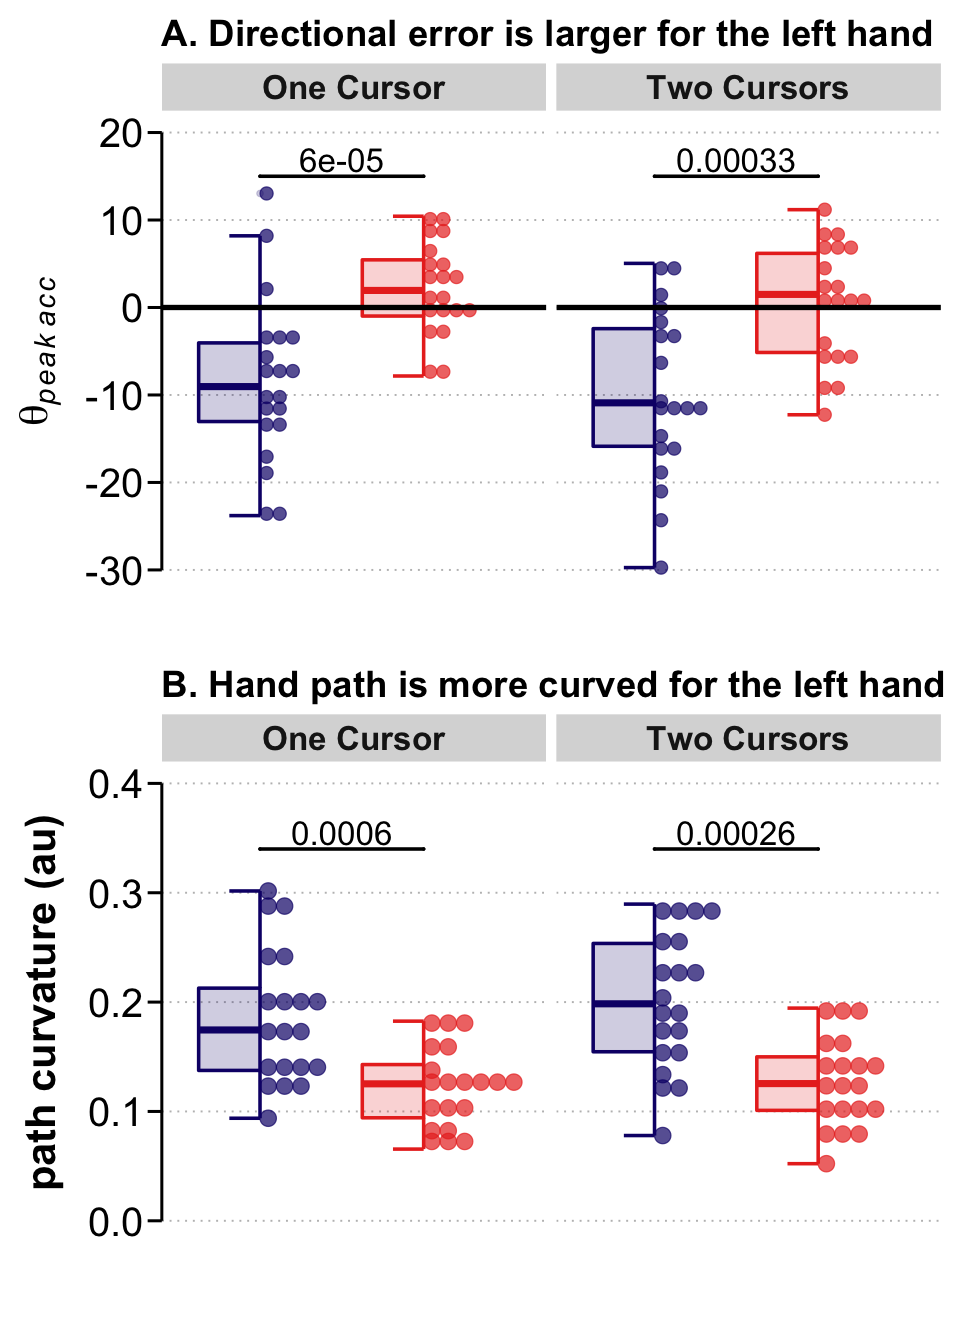

In [87]:
comp = list(c("left","right"))

theta_peakAcc = 
ggplot(LErrorsDat, aes(y=(mnIDE),x=Hand,col=Hand)) + 
  geom_half_dotplot(aes(col=Hand,fill=Hand),binwidth=1.5,alpha = 0.7,show.legend = FALSE)+ 
  geom_half_boxplot(aes(col=Hand,fill=Hand),alpha = 0.2,size = 1, show.legend = FALSE)+ 
coord_capped_cart(ylim= c(-30, 20),bottom = 'both', left='both') + facet_grid(~CondG) +
geom_hline(yintercept = 0,lwd=1.5,lty="solid",col="black") + ylab("initial directional error") + xlab("") +
scale_color_manual(values = c("#110176", "#E93324")) + scale_fill_manual(values = c("#110176","#E93324")) +
stat_compare_means(comparisons = comp,label.y = c(15), na.rm = TRUE,
                   size=7,face="bold",bracket.size = 1,tip.length = 0.0) + 
theme_pubclean() + theme(axis.line.x = element_line(colour = "white"), axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
 ylab(expression(bold(theta)[italic(peak~acc)])) + ggtitle("A. Directional error is larger for the left hand") +
thm

curvature = 
ggplot(LErrorsDat, aes(y=(mnCurv),x=Hand,col=Hand)) + 
  geom_half_dotplot(aes(col=Hand,fill=Hand),binwidth=0.015,alpha = 0.7,show.legend = FALSE)+ 
  geom_half_boxplot(aes(col=Hand,fill=Hand),alpha = 0.2,size = 1, show.legend = FALSE)+ 
coord_capped_cart(ylim= c(0, 0.4),bottom = 'both', left='both') + facet_grid(~CondG) +
scale_color_manual(values = c("#110176", "#E93324")) + scale_fill_manual(values = c("#110176","#E93324")) +
stat_compare_means(comparisons = comp,label.y = c(0.34), na.rm = TRUE,
                   size=7,face="bold",bracket.size = 1,tip.length = 0.0) + 
theme_pubclean() + theme(axis.line.x = element_line(colour = "white"), axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
 ylab("path curvature (au)") + xlab("") + ggtitle("B. Hand path is more curved for the left hand") + thm

options(repr.plot.width=8, repr.plot.height=11)
newSupp1 = theta_peakAcc / curvature

# ggsave(file = "S2.svg", plot = newSupp1, width = 8, height = 11)
newSupp1


### Time between moments of peak acc and peak speed and its comparison between groups

In [88]:
# colnames(data)[1] ="Grp"
data$Grp = factor(data$Grp, levels=c('YNC','RHP','LHP'))


data %>% 
filter(CondG==c("BmC")) %>% 
mutate(Adj = PVDE - IDE,FFDur = (TPV-PPT)*1000) %>%
filter(Hand!="cursor") %>% 
mutate(Trial = as.numeric(Trial)) %>% 
select(Grp,SubNo,Cond,Dist,Hand,Trial,IDE,PPT,Adj,FFDur) %>% 
group_by(Grp,SubNo,Hand) %>% 
summarize(mnAdj = median(Adj),
          mnFFDur = median(FFDur),.groups="drop") %>% 
{.->>AdjFF}

head(AdjFF)

AdjFF %>% 
group_by(Grp) %>% 
summarize(GrpMeanFF = median(mnFFDur), GrpSEFF = parameters::standard_error(mnFFDur))

Grp,SubNo,Hand,mnAdj,mnFFDur
<fct>,<int>,<chr>,<dbl>,<dbl>
YNC,1,left,-4.336570,51.72138
YNC,1,right,6.063695,60.34000
YNC,2,left,1.280545,51.72069
YNC,2,right,-0.330880,60.34000
YNC,3,left,-6.816130,43.10138
YNC,3,right,7.161920,43.10069


Grp,GrpMeanFF,GrpSEFF
<fct>,<dbl>,<dbl>
YNC,51.72069,1.547207
RHP,131.46621,24.583954
LHP,142.24276,22.948625


In [89]:
# Define function to calculate IQR at given quantiles
iqr = function(z, lower = 0.25, upper = 0.75) {
  data.frame(
    y = median(z),
    ymin = quantile(z, lower),
    ymax = quantile(z, upper)
  )
}

In [90]:
iqr(AdjFF$mnFFDur[AdjFF$Grp=="RHP"])
range(AdjFF$mnFFDur[AdjFF$Grp=="RHP"])

,y,ymin,ymax
,<dbl>,<dbl>,<dbl>
25%,131.4662,61.42573,167.0239


[1] -301.7241  254.3128

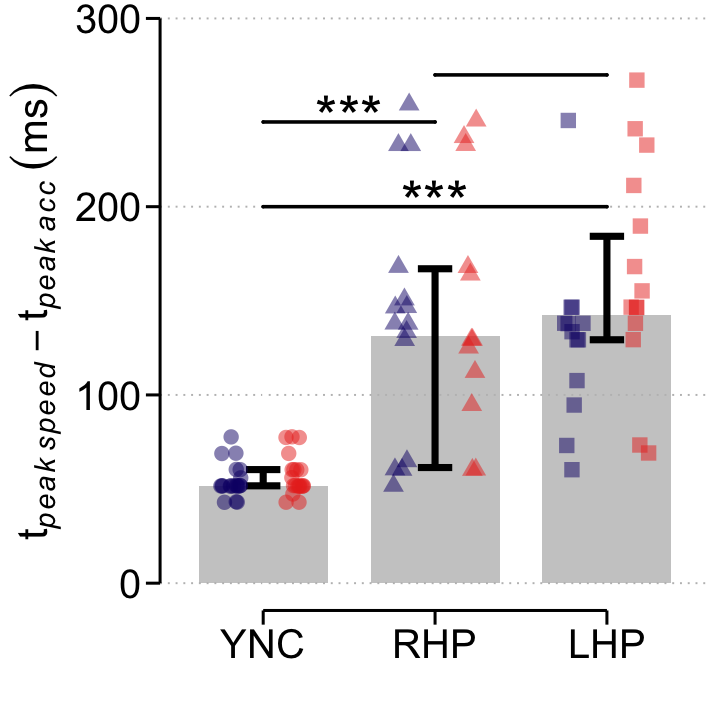

In [91]:
options(repr.plot.width=6, repr.plot.height=6)
my_comparisons = list(c("YNC","LHP"),c("YNC","RHP"),c("LHP","RHP"))
options(warn=-1)
AdjFFDurFig = 
ggplot(aes(x = Grp,y =(mnFFDur),shape=Grp),data =AdjFF) + 
stat_summary(fill="gray",geom="bar",width=.75, alpha = 0.8,fun = median,show.legend = FALSE) + 
stat_summary(fun.data = iqr, fun.args = list(lower = 0.25, upper = 0.75),  lwd=2, geom = "errorbar",width=0.2, show.legend = FALSE) + 
geom_point(aes(col=Hand,shape=Grp),na.rm=TRUE, alpha = 0.5,position = position_jitterdodge(jitter.width = 0.3,jitter.height = 0.2,dodge.width = 0.75),size=4,show.legend=FALSE) +
coord_capped_cart(ylim= c(0, 290),bottom = 'both', left='both') + 
scale_color_manual(values = c("#110176", "#E93324")) + scale_fill_manual(values = c("#110176","#E93324")) +
xlab("") + ylab("Early Phase\nDuration (ms)") +
ylab(expression(t[italic(peak~speed)]-t[italic(peak~acc)]~(ms))) +
stat_compare_means(show.legend=FALSE,vjust = 0.5,comparisons = my_comparisons,label.y=c(200,245,270), na.rm = TRUE,
                   size=12,face="italic",bracket.size = 1,tip.length = 0.0, hide.ns = TRUE,
                  symnum.args=list(cutpoints = c(0.0001, 0.001, 0.05,Inf),symbols = c("***", "**", "ns"))) +
theme_pubclean() + thm + theme(legend.position="none")
AdjFFDurFig
# ggsave(file = "AdjFFDurFig.svg", plot = AdjFFDurFig, width = 6, height = 6)


### Figure 1E & F (+Supp Stroke): one-cursor vs two-cursor mean-centered in YNC, LHP and RHP

In [92]:
incl = colnames(data)[- (1:8)]
data  %>% 
filter(CondG==c("BmC","BmS")) %>% 

unite(col = "group", Grp,Subj,Cond,Trial) %>% 
filter(!group %in% rem2) %>% 
separate(col = group, into = c("Grp","Subj","Cond","Trial"),sep = "_") %>% 
pivot_wider(id_cols = NULL, names_from= Hand,values_from = all_of(incl)) %>% 
{.->>newData}
tail(newData,5)

newData$Grp = factor(newData$Grp, levels=c('YNC','RHP','LHP')) 
colnames(newData)

Grp,Subj,Cond,Trial,SubNo,CondG,Dist,CT_left,CT_right,CT_cursor,⋯,YPosPV_cursor,XPosOff_left,XPosOff_right,XPosOff_cursor,YPosOff_left,YPosOff_right,YPosOff_cursor,XDistPV_left,XDistPV_right,XDistPV_cursor
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LHP,Subj016,BmC15,11,51,BmC,15,0.923,0.923,0.923,⋯,1.119468,0.9256264,1.071626,0.9993287,1.074570,1.156962,1.127890,-0.019821821,-0.013992917,-0.08600599
LHP,Subj016,BmC15,13,51,BmC,15,0.885,0.885,0.885,⋯,1.105135,0.9346889,1.072009,1.0027585,1.124245,1.119674,1.114799,-0.013083113,-0.015627742,-0.08395930
LHP,Subj016,BmC15,15,51,BmC,15,0.995,0.995,0.995,⋯,1.080734,0.9273329,1.065919,0.9965527,1.085324,1.099006,1.092654,-0.016961871,-0.020339184,-0.08830897
LHP,Subj016,BmC15,17,51,BmC,15,0.928,0.928,0.928,⋯,1.067673,0.9462309,1.081473,1.0117921,1.078281,1.097319,1.074236,-0.001889574,-0.005672671,-0.07449025
LHP,Subj016,BmC15,19,51,BmC,15,0.923,0.923,0.923,⋯,1.111223,0.9338825,1.068811,1.0009789,1.121591,1.124981,1.128809,-0.008924704,-0.016251533,-0.08224652


[1] "Grp"             "Subj"            "Cond"            "Trial"          
 [5] "SubNo"           "CondG"           "Dist"            "CT_left"        
 [9] "CT_right"        "CT_cursor"       "RT_left"         "RT_right"       
[13] "RT_cursor"       "PPT_left"        "PPT_right"       "PPT_cursor"     
[17] "TPV_left"        "TPV_right"       "TPV_cursor"      "MT_left"        
[21] "MT_right"        "MT_cursor"       "PV_left"         "PV_right"       
[25] "PV_cursor"       "EE_left"         "EE_right"        "EE_cursor"      
[29] "VE_left"         "VE_right"        "VE_cursor"       "IDE_left"       
[33] "IDE_right"       "IDE_cursor"      "PRDE_left"       "PRDE_right"     
[37] "PRDE_cursor"     "PVDE_left"       "PVDE_right"      "PVDE_cursor"    
[41] "FDE_left"        "FDE_right"       "FDE_cursor"      "FPE_left"       
[45] "FPE_right"       "FPE_cursor"      "IDIST_left"      "IDIST_right"    
[49] "IDIST_cursor"    "PVDIST_left"     "PVDIST_right"    "PVDIST_cursor"  
[53] "FDIST_left"      "FDIST_right"     "FDIST_cursor"    "CURV_left"      
[57] "CURV_right"      "CURV_cursor"     "OnAxErr_left"    "OnAxErr_right"  
[61] "OnAxErr_cursor"  "OffAxErr_left"   "OffAxErr_right"  "OffAxErr_cursor"
[65] "XPosPV_left"     "XPosPV_right"    "XPosPV_cursor"   "YPosPV_left"    
[69] "YPosPV_right"    "YPosPV_cursor"   "XPosOff_left"    "XPosOff_right"  
[73] "XPosOff_cursor"  "YPosOff_left"    "YPosOff_right"   "YPosOff_cursor" 
[77] "XDistPV_left"    "XDistPV_right"   "XDistPV_cursor"

In [93]:
## FOR SPATIAL COOUPLING FIGURE

rXPos_bmC = vector()
rXPos_bmS = vector()

SubjID = vector()

for (i in newData$SubNo)
    {rXPos_bmC[i] = cor.test(newData$XDistPV_left[newData$SubNo==i & newData$CondG=="BmC"],
                             newData$XDistPV_right[newData$SubNo==i & newData$CondG=="BmC"],
                             method = "spearman")$ estimate
     rXPos_bmS[i] = cor.test(newData$XDistPV_left[newData$SubNo==i & newData$CondG=="BmS"],
                             newData$XDistPV_right[newData$SubNo==i & newData$CondG=="BmS"],
                             method = "spearman")$ estimate

     SubjID[i] = toString(i)
    }


rXPos = data.frame(rXPos_bmC,rXPos_bmS)


colnames(rXPos)[1] <- "BmC"
colnames(rXPos)[2] <- "BmS"


j = c(matrix('YNC',20),matrix('RHP',15),matrix('LHP', 16)) #,

rData = data.frame(SubjID,data.frame(j), rXPos)

colnames(rData)[2] = "Grp"

rData  %>% 
pivot_longer(cols = c("BmC","BmS"),"Cond",values_to = "corr")  %>% 

{.->> rData2}

rData2$Grp = factor(rData2$Grp, levels=c('YNC','RHP','LHP'))

head(rData2,4)


SubjID,Grp,Cond,corr
<chr>,<fct>,<chr>,<dbl>
1,YNC,BmC,-0.9157895
1,YNC,BmS,-0.6571429
2,YNC,BmC,-0.9639098
2,YNC,BmS,-0.3669173


### EXP vs CTRL condition in YNC

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.4640602,6.370511,4.125443e-06,19,0.3115937,0.6165266,Paired t-test,two.sided


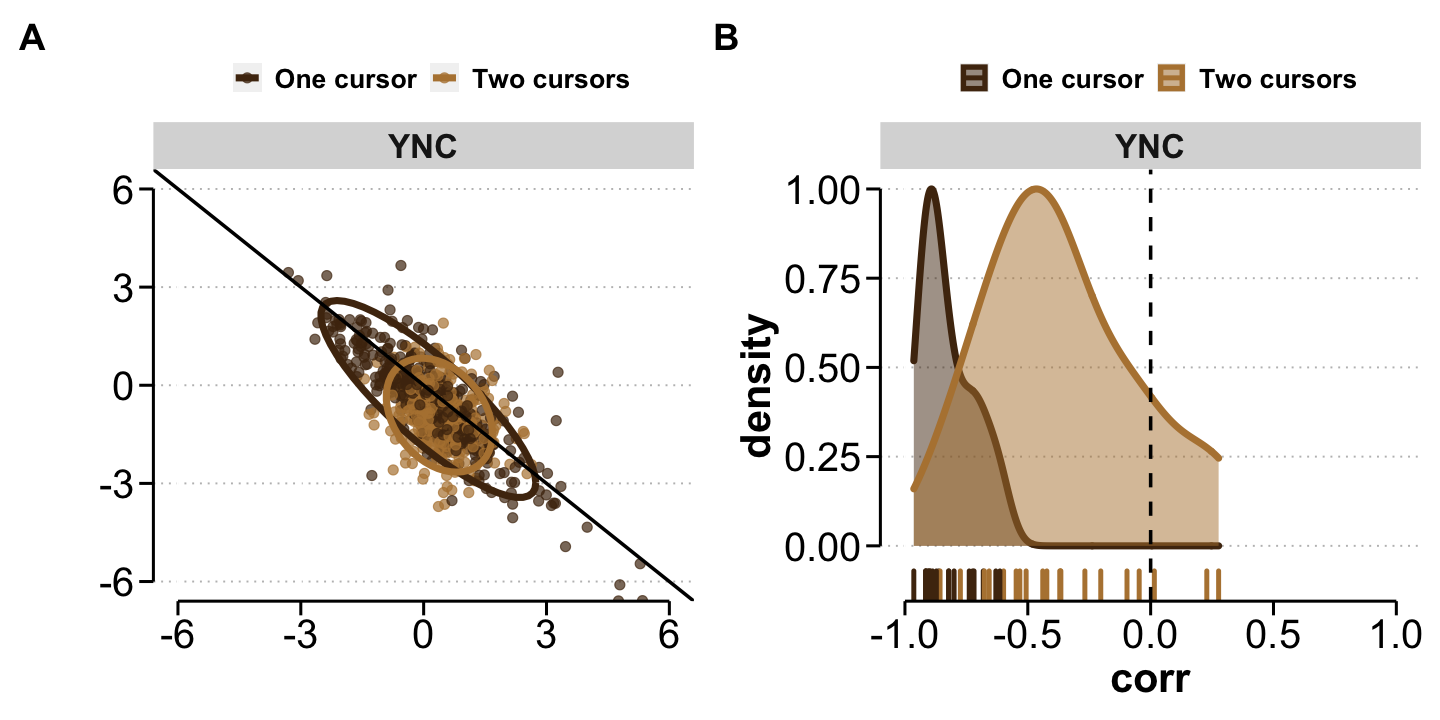

In [94]:
display_markdown('### EXP vs CTRL condition in YNC')
options(repr.plot.width=12, repr.plot.height=6)

glance(t.test(rData2$corr[rData2$Grp=="YNC"&rData2$Cond=="BmS"],
       rData2$corr[rData2$Grp=="YNC"&rData2$Cond=="BmC"],paired = TRUE))
C1 = 
ggplot(aes(x = (XDistPV_right)*100, y=(XDistPV_left)*100, col=CondG),
           data = newData %>% filter(Grp=="YNC")) + 
    geom_point(size=2.5,alpha = 0.7) + stat_ellipse(lwd=2) + 
    coord_capped_cart(xlim = c(-6,6),ylim = c(-6,6), bottom = 'both', left='both') + 
    geom_abline(slope = -1,lwd=1) + 
    ylab("") + xlab("") + 
    theme_pubclean() + thm +  facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"))

D1 = 
ggplot(rData2 %>% filter(Grp=="YNC"), aes(x=corr)) + 
    geom_density(aes(y=..scaled..,colour=Cond, fill=Cond),alpha = 0.5, size=2,show.legend = TRUE) + 
    geom_rug(aes(col = Cond),size = 1.4,length = unit(0.07, "npc"),outside = FALSE, sides = "b") + 
    geom_vline(xintercept = 0,col="black",size=1,linetype = "dashed")+ 
    coord_capped_cart(ylim = c(-0.1,1), xlim = c(-1, 1), bottom = 'both', left='both') + 
    ylab("density") + theme_pubclean() + thm + facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"),name="", labels = c("One cursor","Two cursors"))

YNC = C1 + D1 + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 22))
YNC
# ggsave(file = "YNC_1_2_corr.svg", plot = YNC, width = 12, height = 12)




## EXP vs CTRL condition in RHP

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5504428,4.421112,0.0005807458,14,0.2834099,0.8174757,Paired t-test,two.sided


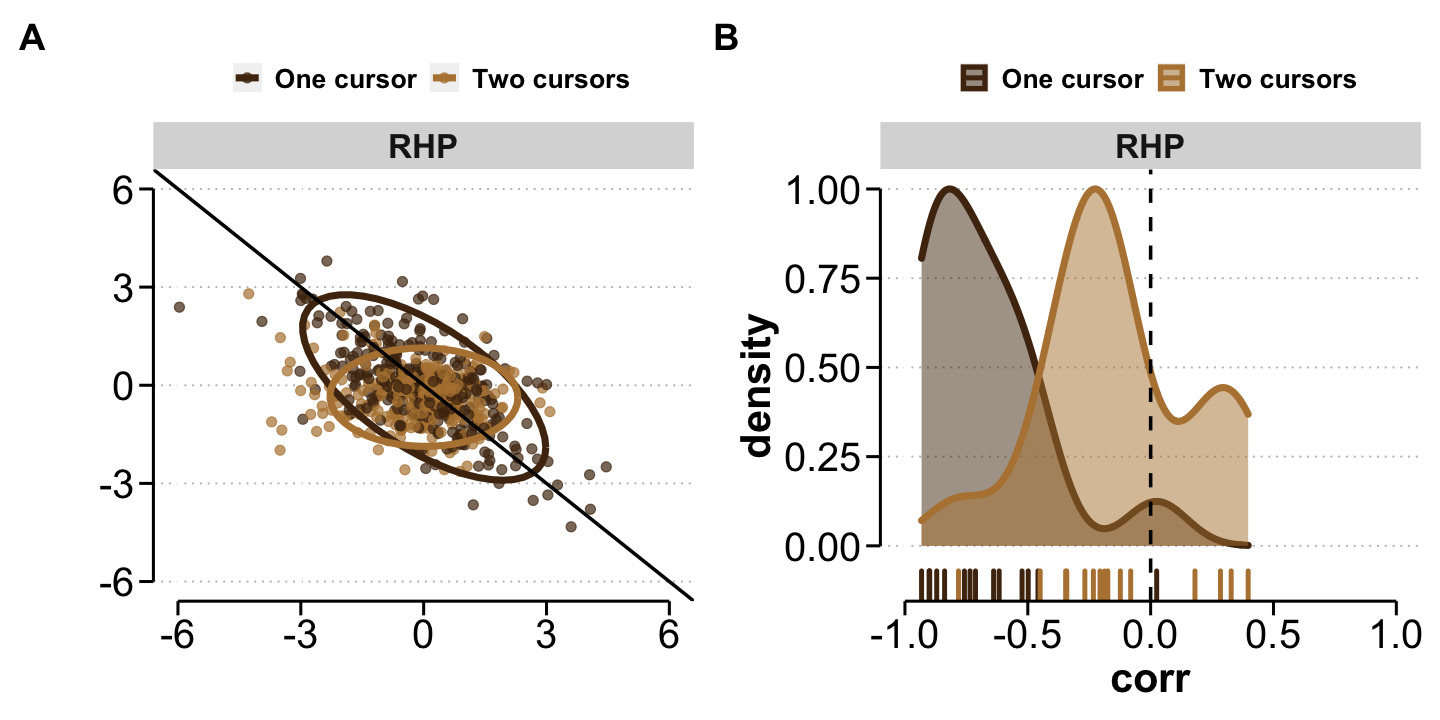

In [95]:
display_markdown('## EXP vs CTRL condition in RHP')
options(repr.plot.width=12, repr.plot.height=6)

glance(t.test(rData2$corr[rData2$Grp=="RHP"&rData2$Cond=="BmS"],
       rData2$corr[rData2$Grp=="RHP"&rData2$Cond=="BmC"],paired = TRUE))

C2 = 
ggplot(aes(x = (XDistPV_right)*100, y=(XDistPV_left)*100, col=CondG),
           data = newData %>% filter(Grp=="RHP")) + 
    geom_point(size=2.5,alpha = 0.7) + stat_ellipse(lwd=2) + 
    coord_capped_cart(xlim = c(-6,6),ylim = c(-6,6), bottom = 'both', left='both') + 
    geom_abline(slope = -1,lwd=1) + 
    ylab("") + xlab("") + 
    theme_pubclean() + thm +  facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"))

D2 = 
ggplot(rData2 %>% filter(Grp=="RHP"), aes(x=corr)) + 
    geom_density(aes(y=..scaled..,colour=Cond, fill=Cond),alpha = 0.5, size=2,show.legend = TRUE) + 
    geom_rug(aes(col = Cond),size = 1.4,length = unit(0.07, "npc"),outside = FALSE, sides = "b") + 
    geom_vline(xintercept = 0,col="black",size=1,linetype = "dashed")+ 
    coord_capped_cart(ylim = c(-0.1,1), xlim = c(-1, 1), bottom = 'both', left='both') + 
    ylab("density") + theme_pubclean() + thm + facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"),name="", labels = c("One cursor","Two cursors"))

RHP = C2 + D2 + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 22))
RHP



## EXP vs CTRL condition in LHP

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5837261,5.480136,8.106093e-05,14,0.3552704,0.8121817,Paired t-test,two.sided


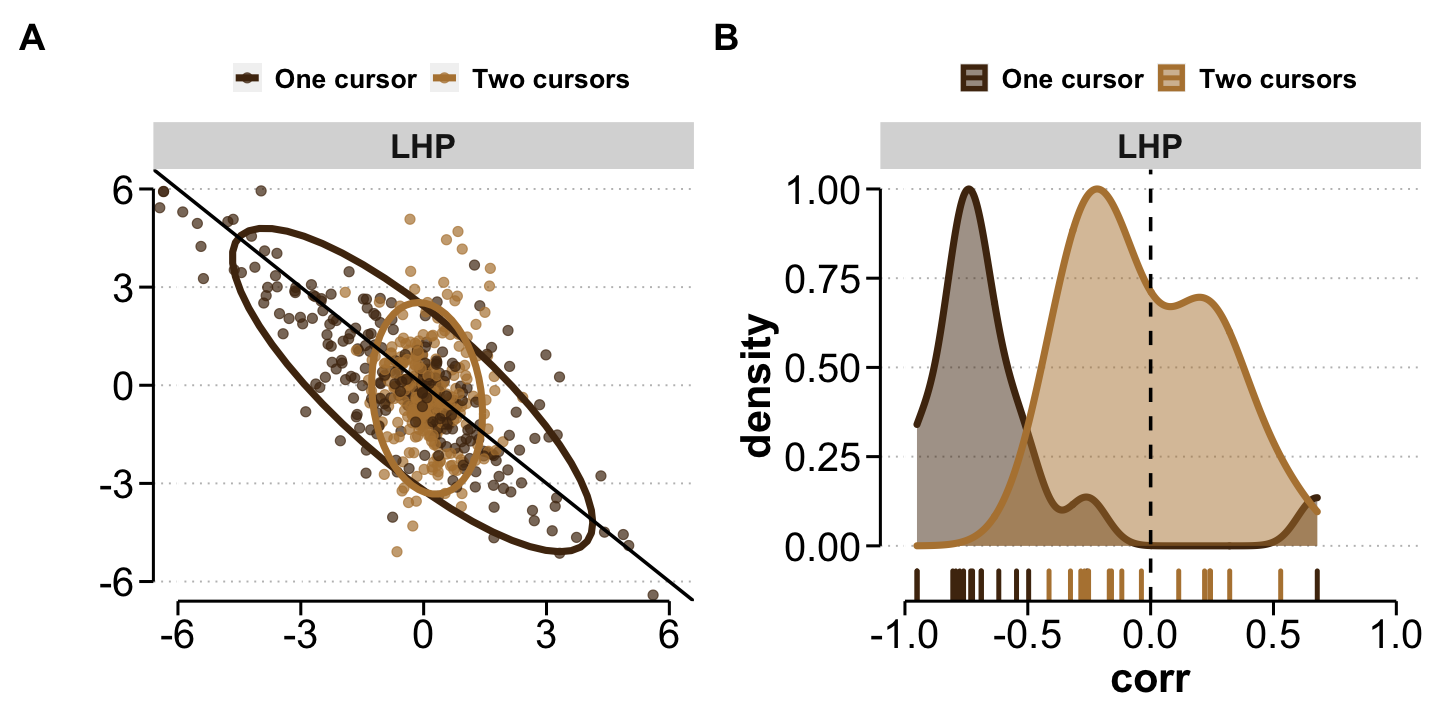

In [96]:
display_markdown('## EXP vs CTRL condition in LHP')
options(repr.plot.width=12, repr.plot.height=6)

glance(t.test(rData2$corr[rData2$Grp=="LHP"&rData2$Cond=="BmS"],
       rData2$corr[rData2$Grp=="LHP"&rData2$Cond=="BmC"],paired = TRUE))

C3 = 
ggplot(aes(x = (XDistPV_right)*100, y=(XDistPV_left)*100, col=CondG),
           data = newData %>% filter(Grp=="LHP")) + 
    geom_point(size=2.5,alpha = 0.7) + stat_ellipse(lwd=2) + 
    coord_capped_cart(xlim = c(-6,6),ylim = c(-6,6), bottom = 'both', left='both') + 
    geom_abline(slope = -1,lwd=1) + 
    ylab("") + xlab("") + 
    theme_pubclean() + thm +  facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"))

D3 = 
ggplot(rData2 %>% filter(Grp=="LHP"), aes(x=corr)) + 
    geom_density(aes(y=..scaled..,colour=Cond, fill=Cond),alpha = 0.5, size=2,show.legend = TRUE) + 
    geom_rug(aes(col = Cond),size = 1.4,length = unit(0.07, "npc"),outside = FALSE, sides = "b") + 
    geom_vline(xintercept = 0,col="black",size=1,linetype = "dashed")+ 
    coord_capped_cart(ylim = c(-0.1,1), xlim = c(-1, 1), bottom = 'both', left='both') + 
    ylab("density") + theme_pubclean() + thm + facet_wrap(~Grp) +
    scale_color_manual(values=c("#503010","#B5833F"),name = "",labels = c("One cursor","Two cursors")) + 
    scale_fill_manual(values=c("#503010","#B5833F"),name="", labels = c("One cursor","Two cursors"))

LHP = C3 + D3 + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 22))
LHP



***
#                 END OF ANALYSIS
***

In [97]:
display_markdown("### Packages in use: ")
search()

display_markdown("### R version & citation: ")
citation()

display_markdown("### Specific package to cite: EMMEANS")
citation("emmeans")


### Packages in use: 

[1] ".GlobalEnv"           "package:ggplotify"    "package:influence.ME"
 [4] "package:svglite"      "package:broom"        "package:emmeans"     
 [7] "package:table1"       "package:sjstats"      "package:sjPlot"      
[10] "package:nlme"         "package:grid"         "package:ggExtra"     
[13] "package:robustlmm"    "package:gghalves"     "package:lme4"        
[16] "package:Matrix"       "package:lemon"        "package:tidyr"       
[19] "package:dplyr"        "package:patchwork"    "package:ggpubr"      
[22] "package:ggplot2"      "package:repr"         "package:IRdisplay"   
[25] "package:jsonlite"     "package:formatR"      "jupyter:irkernel"    
[28] "package:stats"        "package:graphics"     "package:grDevices"   
[31] "package:utils"        "package:datasets"     "package:methods"     
[34] "Autoloads"            "package:base"

### R version & citation: 


To cite R in publications use:

  R Core Team (2020). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2020},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.


### Specific package to cite: EMMEANS


To cite package ‘emmeans’ in publications use:

  Russell V. Lenth (2021). emmeans: Estimated Marginal Means, aka
  Least-Squares Means. R package version 1.7.0.
  https://CRAN.R-project.org/package=emmeans

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {emmeans: Estimated Marginal Means, aka Least-Squares Means},
    author = {Russell V. Lenth},
    year = {2021},
    note = {R package version 1.7.0},
    url = {https://CRAN.R-project.org/package=emmeans},
  }
